# Numerical Optimization and Large Scale Linear Algebra
## Project - A comparison of  LSA and CA of document-term matrices
### Instructor: P. Vassalos

**Student:** Phevos A. Margonis - f3352317

**Date:** 28/MAY/24

---

# Preprocess

In [ ]:
from pathlib import Path
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

data = Path('data')

In [ ]:
# change the default matplotlib style to 'ggplot'
plt.style.use('ggplot')

## Load and combine data

In [ ]:
files = list(data.glob('*.xls*'))

In [ ]:
df1 = pd.read_excel(files[0], names=['id', 'sArea', 'sField', 'sSubField', 'title', 'abstractEnglish', 'abstractGreek', 'keywords'])
df1.head()

,id,sArea,sField,sSubField,title,abstractEnglish,abstractGreek,keywords
0,2397,SA1. Natural Sciences,1.4. Earth and related environmental sciences,NaN,Novel on-site remediation technology using mag...,This project aims to develop an innovative sol...,Η προτεινόμενη ερευνητική πρόταση αποσκοπεί στ...,"magnetic sorbent macro-structures,magnetic (so..."
1,2398,SA1. Natural Sciences,1.1. Physical Sciences,1.1.8. Optics,Imaging beyond Microscopy in Artificio Generat...,Optical microscopy constitutes one of the most...,Η οπτική μικροσκοπία αποτελεί ένα από τα πιο θ...,"Multiparametric optical microscopy,optoacousti..."
2,2399,SA2. Engineering Sciences & Technology,2.7 Medical engineering,2.7.3 Biomedical engineering,"multimOdal bioMedical data, sigNal and Image P...",Parkinson’s disease (PD) is a neurodegenerativ...,Η νόσος του Πάρκινσον (ΝΠ) είναι μια νευροεκφυ...,"Parkinson’s disease,Biomedical Signal Processi..."
3,2401,SA8. Environment & Energy,8.5 Energy resources,8.5.1 Fossil and nuclear energy,"Greek Low-Rank Coals, Lignite and Leonardite, ...",Bentonite is a clay widely used – among others...,"Ο μπεντονίτης είναι άργιλος, που χρησιμοποιείτ...","Greek Lignite and Leonardite,Water-based mud p..."
4,2402,SA1. Natural Sciences,1.6. Other physical/natural sciences,NaN,Quantum Information Theory for Relativistic Fi...,Quantum information theory (QIT) is a generali...,Η κβαντική θεωρία πληροφορίας (ΚΘΠ) είναι μια ...,"Quantum Information,Relativity,Quantum Entangl..."


In [ ]:
df2 = pd.read_excel(files[1], names=['id', 'sArea', 'sField', 'sSubField', 'title', 'titleGreek', 'abstractEnglish', 'abstractGreek', 'keywords'])
df2.head()

,id,sArea,sField,sSubField,title,titleGreek,abstractEnglish,abstractGreek,keywords
0,24911,SA3. Life Sciences,NaN,NaN,DevelopMent of a diAgnoStic Test to prEdict th...,Ανάπτυξη διαγνωστικού τεστ πρόβλεψης της απόκρ...,NaN,NaN,"psoriasis,pharmacogenomics"
1,23488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23730,SA1. Physical Sciences,1.1 Physical Sciences,NaN,Quantum Field Dynamics in the Universe,Δυναμική Κβαντικών Πεδίων στο Σύμπαν,Understanding the dynamics of relativistic Qua...,Η κατανόηση της δυναμικής της σχετικιστικής Κβ...,"quantum field theory,tensor networks,quantum m..."
4,25494,SA1. Physical Sciences,1.1 Physical Sciences,NaN,fgdgh,NaN,NaN,NaN,NaN


In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
df.set_index('id', inplace=True)
df

,sArea,sField,sSubField,title,abstractEnglish,abstractGreek,keywords,titleGreek
id,,,,,,,,
2397,SA1. Natural Sciences,1.4. Earth and related environmental sciences,NaN,Novel on-site remediation technology using mag...,This project aims to develop an innovative sol...,Η προτεινόμενη ερευνητική πρόταση αποσκοπεί στ...,"magnetic sorbent macro-structures,magnetic (so...",NaN
2398,SA1. Natural Sciences,1.1. Physical Sciences,1.1.8. Optics,Imaging beyond Microscopy in Artificio Generat...,Optical microscopy constitutes one of the most...,Η οπτική μικροσκοπία αποτελεί ένα από τα πιο θ...,"Multiparametric optical microscopy,optoacousti...",NaN
2399,SA2. Engineering Sciences & Technology,2.7 Medical engineering,2.7.3 Biomedical engineering,"multimOdal bioMedical data, sigNal and Image P...",Parkinson’s disease (PD) is a neurodegenerativ...,Η νόσος του Πάρκινσον (ΝΠ) είναι μια νευροεκφυ...,"Parkinson’s disease,Biomedical Signal Processi...",NaN
2401,SA8. Environment & Energy,8.5 Energy resources,8.5.1 Fossil and nuclear energy,"Greek Low-Rank Coals, Lignite and Leonardite, ...",Bentonite is a clay widely used – among others...,"Ο μπεντονίτης είναι άργιλος, που χρησιμοποιείτ...","Greek Lignite and Leonardite,Water-based mud p...",NaN
2402,SA1. Natural Sciences,1.6. Other physical/natural sciences,NaN,Quantum Information Theory for Relativistic Fi...,Quantum information theory (QIT) is a generali...,Η κβαντική θεωρία πληροφορίας (ΚΘΠ) είναι μια ...,"Quantum Information,Relativity,Quantum Entangl...",NaN
...,...,...,...,...,...,...,...,...
25913,SA8. Environment & Energy,8.10 Circular economy,8.10.3 Waste and resource management,Advancing Organic Waste Circularity via the Qu...,The primary objectives of CombiCircle is to pr...,Οι πρωταρχικοί στόχοι του CombiCircle είναι να...,"Biochar,co-composting,Circular Economy,Sewage ...",Προώθηση της Κυκλικής Οικονομίας μέσω της βελτ...
26234,SA8. Environment & Energy,8.10 Circular economy,8.10.3 Waste and resource management,Employing intelligent and personalised recomme...,Sustainable food management involves choosing ...,Η αειφόρος διαχείριση των τροφίμων περιλαμβάνε...,"FOOD WASTE,RECOMMENDER SYSTEMS,CONSUMERS,SUSTA...",Χρησιμοποιώντας έξυπνες και εξατομικευμένες συ...
25192,SA8. Environment & Energy,8.10 Circular economy,8.10.3 Waste and resource management,Valorizing different waste streams towards fue...,The ValueInWaste project aspires to provide su...,Το ValueInWaste φιλοδοξεί να παρέχει έξυπνες κ...,"waste,circular economy,valorization,biofuels,b...",Αξιοποίηση διαφορετικών ρευμάτων αποβλήτων προ...


## Clean the DataFrame
1. Remove redundant columns
2. Remove **nan** values.
3. Rename columns
4. Clean labels
5. Remove duplicate entries
6. Remove noisy texts

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4488 entries, 2397 to 26353
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sArea            4486 non-null   object
 1   sField           4485 non-null   object
 2   sSubField        4105 non-null   object
 3   title            4419 non-null   object
 4   abstractEnglish  4382 non-null   object
 5   abstractGreek    4375 non-null   object
 6   keywords         4383 non-null   object
 7   titleGreek       2384 non-null   object
dtypes: object(8)
memory usage: 315.6+ KB


In [ ]:
# print the df where df.sArea is nan
df[df.sArea.isna()]

,sArea,sField,sSubField,title,abstractEnglish,abstractGreek,keywords,titleGreek
id,,,,,,,,
23488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df.abstractEnglish.isna()]

,sArea,sField,sSubField,title,abstractEnglish,abstractGreek,keywords,titleGreek
id,,,,,,,,
24911,SA3. Life Sciences,NaN,NaN,DevelopMent of a diAgnoStic Test to prEdict th...,NaN,NaN,"psoriasis,pharmacogenomics",Ανάπτυξη διαγνωστικού τεστ πρόβλεψης της απόκρ...
23488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25494,SA1. Physical Sciences,1.1 Physical Sciences,NaN,fgdgh,NaN,NaN,NaN,NaN
25798,SA1. Physical Sciences,1.5 Other physical/natural sciences,NaN,Evaluating the Ecological Consequences of Floo...,NaN,NaN,NaN,Αξιολόγηση των οικολογικών επιπτώσεων των πλημ...
...,...,...,...,...,...,...,...,...
25996,SA8. Environment & Energy,8.5 Earth and related environmental sciences,8.5.10 Water resources,TITLE,NaN,NaN,NaN,ELTIT
25234,SA8. Environment & Energy,8.7 Renewable energy resources and systems,8.7.7 Wave and tidal energy,NaN,NaN,NaN,"wave,energy,floating structure,mooring systems...",NaN
25435,SA8. Environment & Energy,8.8 Energy and the built environment,8.8.5 Smart buildings in smart cities,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop all rows where df.abstractEnglish is NaN
df = df.dropna(subset=['abstractEnglish'])
df.shape

(4382, 8)

In [ ]:
# Keep the relevant columns
df = df[['abstractEnglish', 'sArea', 'sField', 'sSubField']]
df.columns = ['text', 'label', 'label_Field', 'label_SubField']

In [ ]:
# Replace nan values with 'NaN'
df.label_SubField = df.label_SubField.fillna('NaN')

In [ ]:
df.label = df.label.str.strip() # Preemptively strip the whitespaces
df.label_Field = df.label_Field.str.strip() # Preemptively strip the whitespaces
df.label_SubField = df.label_SubField.str.strip() # Preemptively strip the whitespaces


## Clean the labels
### Clean labels for scientificArea

In [ ]:
# Check the unique labels
temp = [label for label in df.label.unique()]
len(temp), sorted(temp)

(12,
 ['SA1. Natural Sciences',
  'SA1. Physical Sciences',
  'SA2. Engineering Sciences & Technology',
  'SA3. Life Sciences',
  'SA3. Life Sciences (Medical & Health Sciences)',
  'SA4. Agricultural Sciences – Food Science & Technology',
  'SA5. Mathematics & Information Sciences',
  'SA6. Social Sciences',
  'SA7. Humanities & Arts',
  'SA8. Environment & Energy',
  'SA9. Management & Economics of Innovation',
  'SA9. Management & Economics of Innovations'])

In [ ]:
# Consolidate the duplicated categories
consolidation_mapping = {
    'SA1. Physical Sciences': 'SA1. Natural Sciences',
    'SA3. Life Sciences': 'SA3. Life Sciences (Medical & Health Sciences)',
    'SA9. Management & Economics of Innovation': 'SA9. Management & Economics of Innovations'
}

df.label = df.label.replace(consolidation_mapping)
df.label

id
2397                      SA1. Natural Sciences
2398                      SA1. Natural Sciences
2399     SA2. Engineering Sciences & Technology
2401                  SA8. Environment & Energy
2402                      SA1. Natural Sciences
                          ...                  
24791                 SA8. Environment & Energy
25913                 SA8. Environment & Energy
26234                 SA8. Environment & Energy
25192                 SA8. Environment & Energy
25562                 SA8. Environment & Energy
Name: label, Length: 4382, dtype: object

### Clean the labels for scientifiField
There are duplicate entries in the scientific field that contain typos. The initial 91 classes will automatically be consolidated into 80, preserving their numerical identifiers (e.g., 1.1).

In [ ]:
# Check the unique labels
temp = [label for label in df.label_Field.unique()]
len(temp), sorted(temp)

(91,
 ['1.1 Physical Sciences',
  '1.1. Physical Sciences',
  '1.2 Chemical Sciences',
  '1.2. Chemical Sciences',
  '1.3 Material sciences',
  '1.3. Material sciences',
  '1.4 Universe Sciences',
  '1.4. Earth and related environmental sciences',
  '1.5 Other physical/natural \xa0sciences',
  '1.5. Universe Sciences',
  '1.6. Other physical/natural sciences',
  '2.1 Civil, Surveying & Architectural engineering',
  '2.2 Electrical, electronic & communication engineering',
  '2.3 Mechanical engineering',
  '2.4 Environmental engineering & biotechnology',
  '2.5 Computer and telecommunications engineering',
  '2.6 Chemical and materials engineering',
  '2.7 Medical engineering',
  '2.8 Other Engineering Sciences and Technology',
  '2.8 Other engineering sciences and technology (e.g. security)',
  '3.1 Molecular and Structural Biology, Biochemistry and Molecular biophysics',
  '3.10 Applied Life Sciences, Biotechnology, and Molecular and Biosystems Engineering',
  '3.11 Other Life Science

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def clean_labels(text):
    '''Raw labels contain typos, resulting in duplicate classes. This function normalizes the labels.'''

    text = re.sub(r'\(.*?\)', '', text) # Remove text in brackets
    text = ' '.join(re.findall(r'(\d+(?:\.\d+)+|\D+)', text))
    doc = nlp(text) # Tokenize the text
    processed_text = [token for token in doc
                            if not token.is_punct and
                            not token.is_space and
                            len(token) > 1 and
                            token.text != '\xa0']
    # Reduce plural form to single form
    processed_text = ' '.join([token.lemma_.lower().rstrip('s') if token.pos_ == 'NOUN' or token.pos_ == 'PROPN' and token.text.lower().endswith('s') else token.lemma_.lower() for token in processed_text])

    return processed_text.title()

temp = set([clean_labels(label) for label in df.label_Field.unique()])
len(temp), sorted(temp)

(80,
 ['1.1 Physical Science',
  '1.2 Chemical Science',
  '1.3 Material Science',
  '1.4 Earth And Relate Environmental Science',
  '1.4 Universe Science',
  '1.5 Other Physical Natural Science',
  '1.5 Universe Science',
  '1.6 Other Physical Natural Science',
  '2.1 Civil Surveying Architectural Engineering',
  '2.2 Electrical Electronic Communication Engineering',
  '2.3 Mechanical Engineering',
  '2.4 Environmental Engineering Biotechnology',
  '2.5 Computer And Telecommunication Engineering',
  '2.6 Chemical And Material Engineering',
  '2.7 Medical Engineering',
  '2.8 Other Engineering Science And Technology',
  '3.1 Molecular And Structural Biology Biochemistry And Molecular Biophysic',
  '3.10 Applied Life Science Biotechnology And Molecular And Biosystem Engineering',
  '3.11 Other Life Science',
  '3.2 Genetic Omic Bioinformatic And System Biology',
  '3.3 Cellular And Developmental Biology',
  '3.4 Physiology Pathophysiology And Endocrinology',
  '3.5 Neuroscience And Neur

In [ ]:
df.label_Field = df.label_Field.apply(clean_labels)
df

,text,label,label_Field,label_SubField
id,,,,
2397,This project aims to develop an innovative sol...,SA1. Natural Sciences,1.4 Earth And Relate Environmental Science,NaN
2398,Optical microscopy constitutes one of the most...,SA1. Natural Sciences,1.1 Physical Science,1.1.8. Optics
2399,Parkinson’s disease (PD) is a neurodegenerativ...,SA2. Engineering Sciences & Technology,2.7 Medical Engineering,2.7.3 Biomedical engineering
2401,Bentonite is a clay widely used – among others...,SA8. Environment & Energy,8.5 Energy Resource,8.5.1 Fossil and nuclear energy
2402,Quantum information theory (QIT) is a generali...,SA1. Natural Sciences,1.6 Other Physical Natural Science,NaN
...,...,...,...,...
24791,Since the protection of water resources and aq...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste and resource management
25913,The primary objectives of CombiCircle is to pr...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste and resource management
26234,Sustainable food management involves choosing ...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste and resource management


### Clean the labels for scientifiSubField
There are duplicate entries for the scientifiSubField that contain typos. The initial 454 classes will automatically be consolidated to 415, preserving their numerical identifier (e.g. 1.1.1). 

In [ ]:
# Check the unique labels
temp = [label for label in df.label_SubField.unique()]
len(temp), sorted( temp )

(454,
 ['1.1.1 Acoustics',
  '1.1.1. Acoustics',
  '1.1.10 Laser Physics',
  '1.1.10.\xa0 Laser Physics',
  '1.1.11 Particles and field Physics',
  '1.1.12 Nanotechnology',
  '1.1.2 Atomic Physics',
  '1.1.2. Atomic Physics',
  '1.1.3 Molecular and chemical physics',
  '1.1.3. Molecular and chemical physics',
  '1.1.4 Condensed matter physics',
  '1.1.4. Condensed matter physics',
  '1.1.5 Nanosciences and nanotechnology',
  '1.1.5. Nanosciences and nanotechnology',
  '1.1.6 Fluids and plasma physics',
  '1.1.6. Fluids and plasma physics',
  '1.1.7 Nuclear physics',
  '1.1.7. Nuclear physics',
  '1.1.8 Optics',
  '1.1.8. Optics',
  '1.1.9 Quantum optics',
  '1.1.9. Quantum optics',
  '1.2.1 Analytical chemistry',
  '1.2.2 Applied and industrial chemistry',
  '1.2.3 Colloid chemistry',
  '1.2.4 Inorganic and nuclear chemistry',
  '1.2.5 Organic chemistry',
  '1.2.6 Physical chemistry',
  '1.2.7 Electrochemistry',
  '1.2.8 Nanotechnology',
  '1.2.9 Chemical theory',
  '1.3.1 Material syn

In [ ]:
# Test clean labels
temp = set([clean_labels(label) for label in df.label_SubField.unique()])
len(temp), temp # sorted(temp)

(415,
 {'1.1.1 Acoustic',
  '1.1.10 Laser Physic',
  '1.1.11 Particle And Field Physic',
  '1.1.12 Nanotechnology',
  '1.1.2 Atomic Physic',
  '1.1.3 Molecular And Chemical Physic',
  '1.1.4 Condense Matter Physic',
  '1.1.5 Nanoscience And Nanotechnology',
  '1.1.6 Fluid And Plasma Physic',
  '1.1.7 Nuclear Physic',
  '1.1.8 Optic',
  '1.1.9 Quantum Optic',
  '1.2.1 Analytical Chemistry',
  '1.2.2 Apply And Industrial Chemistry',
  '1.2.3 Colloid Chemistry',
  '1.2.4 Inorganic And Nuclear Chemistry',
  '1.2.5 Organic Chemistry',
  '1.2.6 Physical Chemistry',
  '1.2.7 Electrochemistry',
  '1.2.8 Nanotechnology',
  '1.2.9 Chemical Theory',
  '1.3.1 Material Synthesi',
  '1.3.2 Structure Property Relation',
  '1.3.3 Functional And Advanced Material',
  '1.3.4 Material',
  '1.3.5 Material Property',
  '1.3.6 Polymer Science',
  '1.3.7 Composite Material',
  '1.3.8 Nanotechnology',
  '1.4.1 Astronomy',
  '1.4.1 Climatology',
  '1.4.10 Water Resource',
  '1.4.2 Astro Physic Chemistry Biolog

In [ ]:
df.label_SubField = df.label_SubField.apply(clean_labels)
df

,text,label,label_Field,label_SubField
id,,,,
2397,This project aims to develop an innovative sol...,SA1. Natural Sciences,1.4 Earth And Relate Environmental Science,Nan
2398,Optical microscopy constitutes one of the most...,SA1. Natural Sciences,1.1 Physical Science,1.1.8 Optic
2399,Parkinson’s disease (PD) is a neurodegenerativ...,SA2. Engineering Sciences & Technology,2.7 Medical Engineering,2.7.3 Biomedical Engineering
2401,Bentonite is a clay widely used – among others...,SA8. Environment & Energy,8.5 Energy Resource,8.5.1 Fossil And Nuclear Energy
2402,Quantum information theory (QIT) is a generali...,SA1. Natural Sciences,1.6 Other Physical Natural Science,Nan
...,...,...,...,...
24791,Since the protection of water resources and aq...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste And Resource Management
25913,The primary objectives of CombiCircle is to pr...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste And Resource Management
26234,Sustainable food management involves choosing ...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste And Resource Management


In [ ]:
# change the label type to categorical
df['label'] = df['label'].astype('category')
df['label_Field'] = df['label_Field'].astype('category')
df['label_SubField'] = df['label_SubField'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4382 entries, 2397 to 25562
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   text            4382 non-null   object  
 1   label           4382 non-null   category
 2   label_Field     4382 non-null   category
 3   label_SubField  4382 non-null   category
dtypes: category(3), object(1)
memory usage: 108.0+ KB


## Check for duplicated texts

In [ ]:
df.describe()

,text,label,label_Field,label_SubField
count,4382,4382,4382,4382
unique,4371,9,80,415
top,The subject matter of this research project is...,SA3. Life Sciences (Medical & Health Sciences),5.2 Computer And Information Science,Nan
freq,2,935,245,369


> Here we notice that there are duplicated texts.

In [ ]:
# Find the duplicated texts
text = df.text
print(f" Number of duplicated texts: {len(text[text.duplicated()])}")
df[text.duplicated()]

 Number of duplicated texts: 11


,text,label,label_Field,label_SubField
id,,,,
4437,The project focuses on heterochromatin remodel...,SA3. Life Sciences (Medical & Health Sciences),3.3 Cellular And Developmental Biology,3.3.7 Stem Cell Biology
25823,"Psoriasis, is a chronic inflammatory, non-cont...",SA1. Natural Sciences,1.5 Other Physical Natural Science,Nan
24884,The proposed project aims to improve our under...,SA8. Environment & Energy,8.3 Meteorology,Nan
26351,Type II diabetes constitutes one of the bigges...,SA1. Natural Sciences,1.2 Chemical Science,1.2.5 Organic Chemistry
23253,Passive control systems have been used for man...,SA2. Engineering Sciences & Technology,2.1 Civil Surveying Architectural Engineering,2.1.2 Architecture Engineering
23763,The dominance of wireless communication has ma...,SA2. Engineering Sciences & Technology,2.2 Electrical Electronic Communication Engine...,2.2.3 Communication Engineering And System
26914,The current proposal aims to study and develop...,SA2. Engineering Sciences & Technology,2.3 Mechanical Engineering,2.3.4 Aerospace Engineering
24811,Naturally occurring autoantibodies (NAbs) are ...,SA3. Life Sciences (Medical & Health Sciences),3.4 Physiology Pathophysiology And Endocrinology,3.4.2 Pathophysiology
26815,The role of diseases in marine mammals is comp...,SA3. Life Sciences (Medical & Health Sciences),3.9 Ecology Evolution Population And Environme...,3.9.4 Biodiversity


In [ ]:
# Find the labels assigned to each duplicated text
duplicated_text = text[text.duplicated()]
for i in range(len(duplicated_text)):
    print(list(df[df.text == duplicated_text.iloc[i]].label))

['SA3. Life Sciences (Medical & Health Sciences)', 'SA3. Life Sciences (Medical & Health Sciences)']
['SA1. Natural Sciences', 'SA1. Natural Sciences']
['SA8. Environment & Energy', 'SA8. Environment & Energy']
['SA1. Natural Sciences', 'SA1. Natural Sciences']
['SA2. Engineering Sciences & Technology', 'SA2. Engineering Sciences & Technology']
['SA2. Engineering Sciences & Technology', 'SA2. Engineering Sciences & Technology']
['SA2. Engineering Sciences & Technology', 'SA2. Engineering Sciences & Technology']
['SA3. Life Sciences (Medical & Health Sciences)', 'SA3. Life Sciences (Medical & Health Sciences)']
['SA4. Agricultural Sciences – Food Science & Technology', 'SA3. Life Sciences (Medical & Health Sciences)']
['SA6. Social Sciences', 'SA6. Social Sciences']
['SA1. Natural Sciences', 'SA8. Environment & Energy']


> Most of the texts are simply duplicates (when assesed only by their Scientific Area). Only two are assigned to more than one category. We will treat this problem as a single-label multi-class classification problem. As such, we will remove the redundant entries.

In [ ]:
df.drop_duplicates(subset='text', keep='first', inplace=True)
df.describe()

,text,label,label_Field,label_SubField
count,4371,4371,4371,4371
unique,4371,9,80,415
top,This project aims to develop an innovative sol...,SA3. Life Sciences (Medical & Health Sciences),5.2 Computer And Information Science,Nan
freq,1,932,245,367


### Visualize length of texts

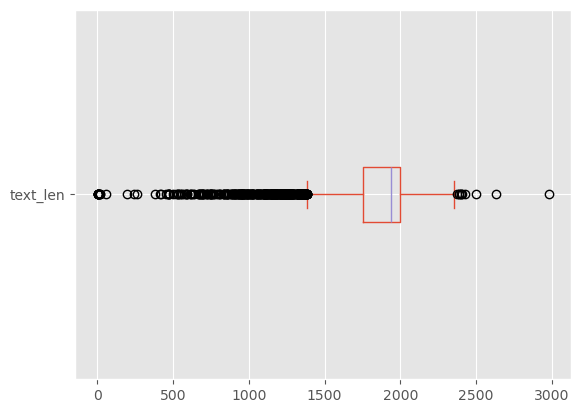

In [ ]:
# Create a pandas boxplot for the len of 'text'
df['text_len'] = df.text.apply(len)
df.text_len.plot.box(vert=False);

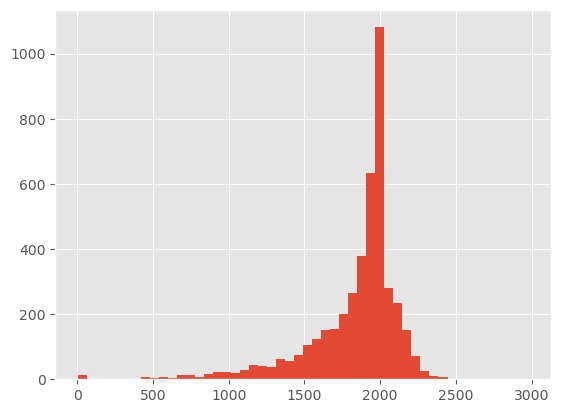

In [ ]:
df.text_len.hist(bins=50);

In [ ]:
df[df.text_len < 200]

,text,label,label_Field,label_SubField,text_len
id,,,,,
4307,The discovery of graphene created the field of...,SA1. Natural Sciences,1.3 Material Science,1.3.4 Material,59
4423,Development models of computational fluid dyna...,SA1. Natural Sciences,1.1 Physical Science,1.1.6 Fluid And Plasma Physic,198
25438,vcsdvdszvf,SA8. Environment & Energy,8.6 Energy Resource,Nan,10
25453,test,SA1. Natural Sciences,1.1 Physical Science,1.1.1 Acoustic,4
25027,tbd,SA2. Engineering Sciences & Technology,2.2 Electrical Electronic Communication Engine...,2.2.1 Electrical And Electronic Engineering,3
25586,xxxx,SA2. Engineering Sciences & Technology,2.3 Mechanical Engineering,2.3.6 Automotive Engineering,4
23724,AI ENGINEERING,SA2. Engineering Sciences & Technology,2.7 Medical Engineering,2.7.3 Biomedical Engineering,14
24845,σααααααααααααααα,SA3. Life Sciences (Medical & Health Sciences),3.8 Applied Medical Technologie Diagnostic The...,3.8.1 Diagnostic Tool,16
25050,hdfh,SA4. Agricultural Sciences – Food Science & Te...,4.1 Agriculture Forestry And Fishery,4.1.1 Agriculture,4


In [ ]:
df[df.text_len < 200].iloc[0,0], df[df.text_len < 200].iloc[1,0]

('The discovery of graphene created the field of 2D materials',
 'Development models of computational fluid dynamics, analysis of dynamic system modes (DMD) and deep learning to support the clinical practice of treating intracranial aneurysms and cancerous tumors.')

In [ ]:
df.drop(df[df.text_len < 50].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 2397 to 25562
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   text            4359 non-null   object  
 1   label           4359 non-null   category
 2   label_Field     4359 non-null   category
 3   label_SubField  4359 non-null   category
 4   text_len        4359 non-null   int64   
dtypes: category(3), int64(1), object(1)
memory usage: 141.6+ KB


> A cluster of text with fewer than 100 words was noticed. Most of these texts contained only noise and were thus removed. Any text with relatively small amount of words is expected to prove difficult in the categorization process.

In [ ]:
# Sample some random texts to further check for noise
for i, text in enumerate(df.text.sample(5)):
    print(f"{i+1}.",text[:1000], '\n')

1. Landslides are considered as one of the most dangerous and destructive natural hazards worldwide. Various natural and anthropogenic processes can be acknowledged as causal factors, leading to the increase of the slope instability and the forthcoming landslide activity. In most cases the impact of those factors in triggering landslide phenomena in not well constrained and examined. Usually it depends on the predominant ones that will interact with each other and become capable of triggering landslide occurrence. The devastative impact of landslides on human life and environment can be significant, especially in the case of the rainfall-triggered ones, where very limited research work exists in evaluating the importance of the interrelated factors individually to the overall assessment of the landslides occurrence. This project aims to develop an advanced methodological framework for integrating and managing various types of spatial and spectral information associated with the occurre

In [ ]:
# Drop the text_len column
df.drop('text_len', axis=1, inplace=True)
df

,text,label,label_Field,label_SubField
id,,,,
2397,This project aims to develop an innovative sol...,SA1. Natural Sciences,1.4 Earth And Relate Environmental Science,Nan
2398,Optical microscopy constitutes one of the most...,SA1. Natural Sciences,1.1 Physical Science,1.1.8 Optic
2399,Parkinson’s disease (PD) is a neurodegenerativ...,SA2. Engineering Sciences & Technology,2.7 Medical Engineering,2.7.3 Biomedical Engineering
2401,Bentonite is a clay widely used – among others...,SA8. Environment & Energy,8.5 Energy Resource,8.5.1 Fossil And Nuclear Energy
2402,Quantum information theory (QIT) is a generali...,SA1. Natural Sciences,1.6 Other Physical Natural Science,Nan
...,...,...,...,...
24791,Since the protection of water resources and aq...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste And Resource Management
25913,The primary objectives of CombiCircle is to pr...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste And Resource Management
26234,Sustainable food management involves choosing ...,SA8. Environment & Energy,8.10 Circular Economy,8.10.3 Waste And Resource Management


## Preprocess texts
The preprocessing of texts will adhere to the same methodology described in *section 5.1* of the paper [A comparison of latent semantic analysis and correspondence analysis of document-term matrices](https://www.cambridge.org/core/journals/natural-language-engineering/article/comparison-of-latent-semantic-analysis-and-correspondence-analysis-of-documentterm-matrices/96316CBB94CD9DD681CB50D9F52E0201), which comprises the following techniques:
1. Lowercasing
2. Punctuation removal
3. Digit removal
4. Stop-words removal
6. Lemmatization

In [ ]:
def preprocess_text(text):
    '''Lowercase, remove punctuations and numbers, remove stopwords, remove words shorter than 2 characters and lemmatize'''
    doc = nlp(text) # Tokenize the text
    processed_text = ' '.join([token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and len(token) > 1])
    return processed_text

temp = df.text.sample().values[0]
print(f"Original text: \n {temp} \n\nProcessed text: \n {preprocess_text(temp)}")

Original text: 
 The aim of the proposed research project is to combine computational fluid dynamics (CFD), analysis of dynamic system modes (or dynamic mode decomposition analysis) and machine learning - deep learning to support and enhance the clinical practice of treating two main aneurysmal diseases, namely (A) intracranial aneurysms (IA) and (B) ascending thoracic aorta aneurysms (ATAA). The proposed project aims to produce state-of-the-art models, patient-tailored, to assess aneurysms and ultimately the risk of dissection/rupture, as well as diagnostic software and/or non-invasive sensory hardware, to be used as medical assistants.
	Intracranial aneurysms refer to abnormal localized stretching or swelling in the cerebral vessel wall. Statistics show that 2-6% of the general population may host intracranial aneurysm. The mortality rate is between 32-67%. The clinical outcome of an aneurysm rupture is unpredictable, with mortality ranging from close to 50% within thirty days. Of th

> Compare Processing Time with and without Multiprocessing to evaluate the efficiency of our approach, we compare the processing time with and without multiprocessing.

In [ ]:
%%time
df['text'] = df.text.apply(preprocess_text)

CPU times: total: 4min 1s
Wall time: 4min 19s


In [ ]:
%%time
clean_texts = []
for doc in nlp.pipe(df.text.values, batch_size=1000):
    clean_texts.append(' '.join([token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and len(token) > 1]))

CPU times: total: 2min 50s
Wall time: 3min 5s


In [ ]:
del clean_texts

In [ ]:
df.to_pickle(data/'papers_df.pkl')

# Visualize class separation
---

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import prince # Coordination Analysis library

data = Path('data')

In [ ]:
# change the default matplotlib style to 'ggplot'
plt.style.use('ggplot')

## Load texts

In [ ]:
df = pd.read_pickle(data/'papers_df.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 2397 to 25562
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   text            4359 non-null   object  
 1   label           4359 non-null   category
 2   label_Field     4359 non-null   category
 3   label_SubField  4359 non-null   category
dtypes: category(3), object(1)
memory usage: 89.1+ KB


In [ ]:
df.head(5)

,text,label,label_Field,label_SubField
id,,,,
2397,project aim develop innovative solution manage...,SA1. Natural Sciences,1.4 Earth And Relate Environmental Science,Nan
2398,optical microscopy constitute fundamental para...,SA1. Natural Sciences,1.1 Physical Science,1.1.8 Optic
2399,parkinson disease pd neurodegenerative disorde...,SA2. Engineering Sciences & Technology,2.7 Medical Engineering,2.7.3 Biomedical Engineering
2401,bentonite clay widely low cost additive drilli...,SA8. Environment & Energy,8.5 Energy Resource,8.5.1 Fossil And Nuclear Energy
2402,quantum information theory qit generalization ...,SA1. Natural Sciences,1.6 Other Physical Natural Science,Nan


## Vectorization
The vectorization of texts will adhere to the same methodology described in *section 2.2*, *section 3* and *section 5.1* of the paper [A comparison of latent semantic analysis and correspondence analysis of document-term matrices](https://www.cambridge.org/core/journals/natural-language-engineering/article/comparison-of-latent-semantic-analysis-and-correspondence-analysis-of-documentterm-matrices/96316CBB94CD9DD681CB50D9F52E0201), which comprises the following techniques:
1. Create the Term-Frequency matirx **F** and weigh the row elements, to use in **LSA-RAW**.
2. Normalized the rows of **F** with the L1 norm, to use in **LSA-NROWL1**.
2. Normalized the rows of **F** with the L2 norm, to use in **LSA-NROWL2**.
3. Create the **TFIDF** matrix, to use in **LSA-TFIDF**.
4. Use the **F** matrix in **CA**.

## Visualization
For the visualization part, the paper uses the complete dataset to decompose it into 2 dimentions and plot each document in that reduced space

### LSA Visualization


In [ ]:
from sklearn.base import TransformerMixin

## Initialize vectorizers
VEC_RAW = TfidfVectorizer(min_df=10, lowercase=False, norm=None, use_idf=False)
VEC_NROWL1 = TfidfVectorizer(min_df=10, lowercase=False, norm='l1', use_idf=False)
VEC_NROW2 = TfidfVectorizer(min_df=10, lowercase=False, norm='l2', use_idf=False)
VEC_TFIDF = TfidfVectorizer(min_df=10, lowercase=False, use_idf=True)

## Initialize LSA and CA objects
LSA = TruncatedSVD(n_components=2, n_iter=10, random_state=42)

## Make pipelines
pipe_raw = make_pipeline(VEC_RAW, LSA)
pipe_nrowl1 = make_pipeline(VEC_NROWL1, LSA)
pipe_nrowl2 = make_pipeline(VEC_NROW2, LSA)
pipe_tfidf = make_pipeline(VEC_TFIDF, LSA)

In [ ]:
U_raw = pipe_raw.fit_transform(df.text)
U_nrowl1 = pipe_nrowl1.fit_transform(df.text)
U_nrowl2 = pipe_nrowl2.fit_transform(df.text)
U_tfidf = pipe_tfidf.fit_transform(df.text)

In [ ]:
# U_raw.shape, U_nrowl1.shape, U_nrow2.shape, U_tfidf.shape, U_raw[:3,:]

### CA Visualization

In [ ]:
VEC_CA = CountVectorizer(min_df=10, lowercase=False)

X = VEC_CA.fit_transform(df.text)
X = pd.DataFrame(X.toarray(), columns=VEC_CA.get_feature_names_out(), index=df.index).fillna(0) # 'prince' library expects a contingency table

In [ ]:
X

,ab,aberrant,aberration,ability,abiotic,able,abnormal,abnormality,abroad,absence,...,yield,young,youth,zebrafish,zeolite,zero,zinc,zno,zone,τhe
id,,,,,,,,,,,,,,,,,,,,,
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop rows that sum to 0, because CA can't handle them due to the calculation r_{i}
X = X.loc[(X != 0).any(axis=1)]
X

,ab,aberrant,aberration,ability,abiotic,able,abnormal,abnormality,abroad,absence,...,yield,young,youth,zebrafish,zeolite,zero,zinc,zno,zone,τhe
id,,,,,,,,,,,,,,,,,,,,,
2397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2399,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> The above process removed 2 documents from the CA analysis because their features were *zero vectors*.

In [ ]:
ca = prince.CA(n_components=2, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
ca.fit(X)

In [ ]:
# Perform the CA and get the U matrix
U_ca = ca.row_coordinates(X)
U_ca

,0,1
id,,
2397,-0.057656,0.938153
2398,0.244003,0.344117
2399,0.279989,-0.543919
2401,-0.034073,1.019829
2402,-0.395670,0.596207
...,...,...
24791,0.428817,0.182256
25913,0.069400,0.471721
26234,-0.408410,-0.011081


In [ ]:
filtered_labels = df[df.index.isin(U_ca.index)].label
filtered_labels

id
2397                      SA1. Natural Sciences
2398                      SA1. Natural Sciences
2399     SA2. Engineering Sciences & Technology
2401                  SA8. Environment & Energy
2402                      SA1. Natural Sciences
                          ...                  
24791                 SA8. Environment & Energy
25913                 SA8. Environment & Energy
26234                 SA8. Environment & Energy
25192                 SA8. Environment & Energy
25562                 SA8. Environment & Energy
Name: label, Length: 4357, dtype: category
Categories (9, object): ['SA1. Natural Sciences', 'SA2. Engineering Sciences & Technology', 'SA3. Life Sciences (Medical & Health Sciences)', 'SA4. Agricultural Sciences – Food Science & T..., ..., 'SA6. Social Sciences', 'SA7. Humanities & Arts', 'SA8. Environment & Energy', 'SA9. Management & Economics of Innovations']

In [ ]:
import seaborn as sns
sns.set_theme()

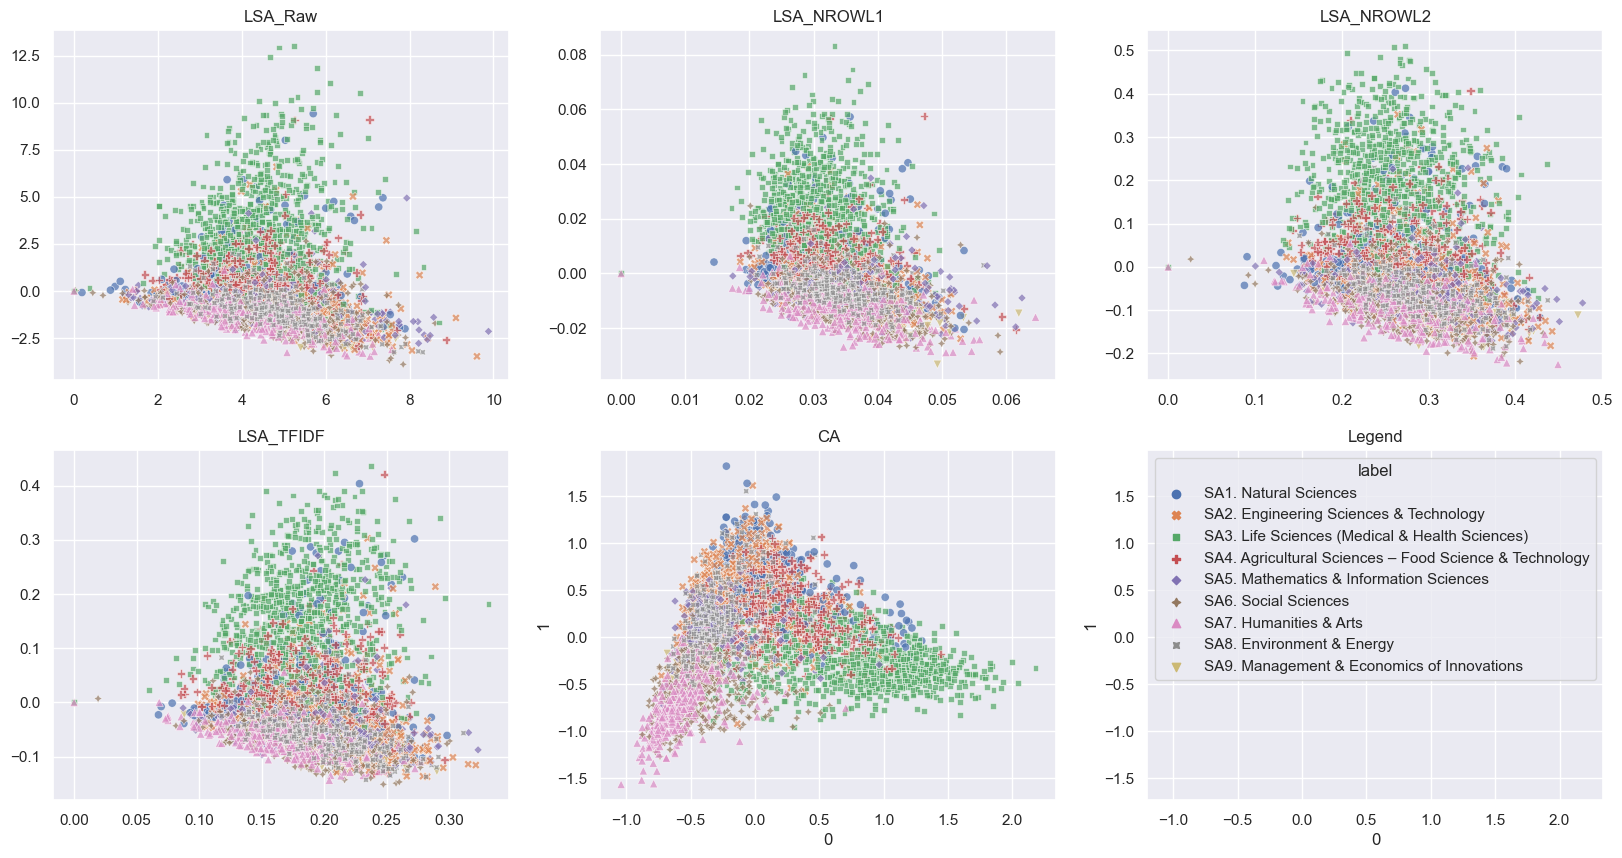

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.title('LSA_Raw')
sns.scatterplot(x=U_raw[:, 0], y=U_raw[:, 1], hue=df.label, style=df.label, alpha=0.7, legend=False);
plt.subplot(2,3,2)
plt.title('LSA_NROWL1')
sns.scatterplot(x=U_nrowl1[:, 0], y=U_nrowl1[:, 1], hue=df.label, style=df.label, alpha=0.7, legend=False);
plt.subplot(2,3,3)
plt.title('LSA_NROWL2')
sns.scatterplot(x=U_nrowl2[:, 0], y=U_nrowl2[:, 1], hue=df.label, style=df.label, alpha=0.7, legend=False);
plt.subplot(2,3,4)
plt.title('LSA_TFIDF')
sns.scatterplot(x=U_tfidf[:, 0], y=U_tfidf[:, 1], hue=df.label, style=df.label, alpha=0.7, legend=False);
plt.subplot(2,3,5)
plt.title('CA')
p5 = sns.scatterplot(x=U_ca.iloc[:, 0], y=U_ca.iloc[:, 1], hue=filtered_labels, style=filtered_labels, alpha=0.7, legend=False);
plt.subplot(2,3,6)
plt.title('Legend')
# Print only the legend
p5 = sns.scatterplot(x=U_ca.iloc[:, 0], y=U_ca.iloc[:, 1], hue=df.label, style=df.label, alpha=0.0, legend='full');
plt.show()

As seen from the above plot, the **Correspondence Analysis (CA)** achieves better separation of the classes with only two components, compared with all the other variants of **LSA**, thus validating the findings of the paper.

# Classify documents
---

In [ ]:
from pathlib import Path
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import prince # Coordination Analysis library
from tqdm import tqdm


data = Path('data')

In [ ]:
# change the default matplotlib style to 'ggplot'
plt.style.use('ggplot')

## Load texts

In [ ]:
df = pd.read_pickle(data/'papers_df.pkl')
# replace 'Nan' values in df.label_SubField with nan
df = df.replace('Nan', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 2397 to 25562
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   text            4359 non-null   object  
 1   label           4359 non-null   category
 2   label_Field     4359 non-null   category
 3   label_SubField  3993 non-null   category
dtypes: category(3), object(1)
memory usage: 107.6+ KB


In [ ]:
df.head()

,text,label,label_Field,label_SubField
id,,,,
2397,project aim develop innovative solution manage...,SA1. Natural Sciences,1.4 Earth And Relate Environmental Science,NaN
2398,optical microscopy constitute fundamental para...,SA1. Natural Sciences,1.1 Physical Science,1.1.8 Optic
2399,parkinson disease pd neurodegenerative disorde...,SA2. Engineering Sciences & Technology,2.7 Medical Engineering,2.7.3 Biomedical Engineering
2401,bentonite clay widely low cost additive drilli...,SA8. Environment & Energy,8.5 Energy Resource,8.5.1 Fossil And Nuclear Energy
2402,quantum information theory qit generalization ...,SA1. Natural Sciences,1.6 Other Physical Natural Science,NaN


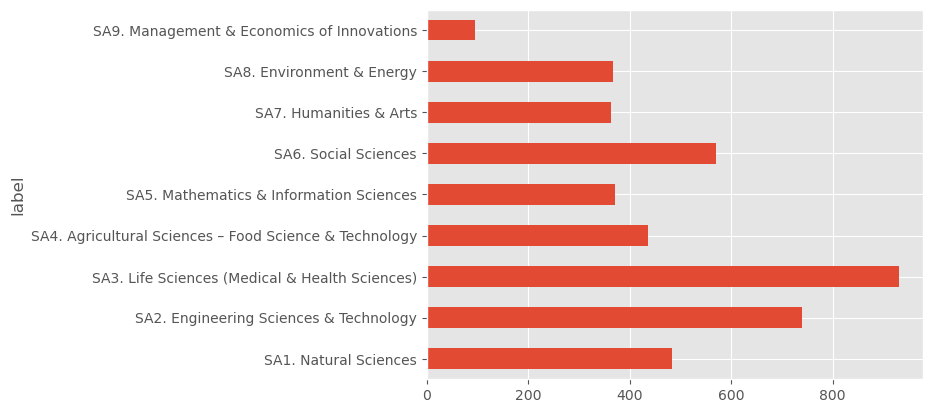

In [ ]:
df.label.value_counts().sort_index().plot.barh();

In [ ]:
# Train test split the df
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df.label)

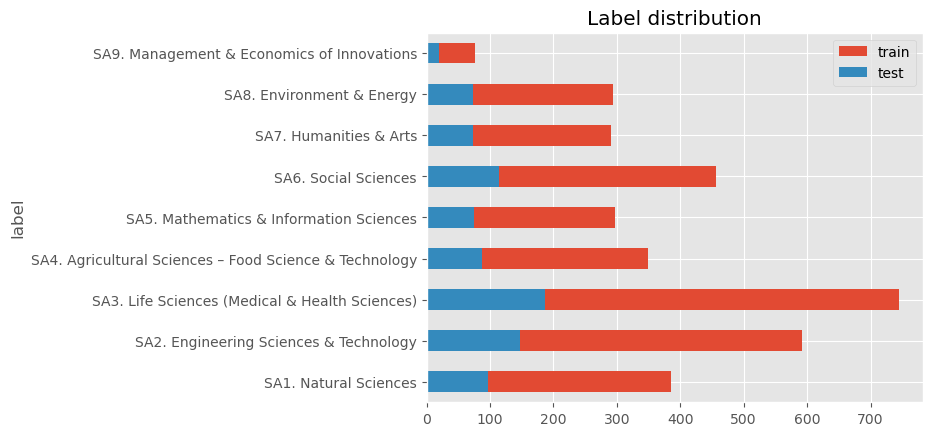

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Get the ggplot color palette

plt.subplot(1,1,1)
plt.title('Label distribution')
train_df.label.value_counts().sort_index().plot.barh(color=colors[0], label='train')
test_df.label.value_counts().sort_index().plot.barh(color=colors[1], label='test')
plt.legend()
plt.show()


## Compute the LSA accuracies using Centroid method

In [ ]:
kappa = range(1, 401, 10)

In [ ]:
lsa_raw_accuracies = []
for k in tqdm(kappa):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm=None, use_idf=False)),
        ('svd', TruncatedSVD(n_components=k, random_state=42)),
        ('clf', NearestCentroid())
    ])

    # Fit the pipeline
    pipeline.fit(train_df.text, train_df.label)
    y_pred = pipeline.predict(test_df.text)

    # Evaluate the predictions
    accuracy = accuracy_score(test_df.label, y_pred)
    lsa_raw_accuracies.append(accuracy)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
lsa_l1_accuracies = []
for k in tqdm(kappa):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm='l1', use_idf=False)),
        ('svd', TruncatedSVD(n_components=k, random_state=42)),
        ('clf', NearestCentroid())
    ])

    # Fit the pipeline
    pipeline.fit(train_df.text, train_df.label)
    y_pred = pipeline.predict(test_df.text)

    # Evaluate the predictions
    accuracy = accuracy_score(test_df.label, y_pred)
    lsa_l1_accuracies.append(accuracy)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
lsa_l2_accuracies = []
for k in tqdm(kappa):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm='l2', use_idf=False)),
        ('svd', TruncatedSVD(n_components=k, random_state=42)),
        ('clf', NearestCentroid())
    ])

    # Fit the pipeline
    pipeline.fit(train_df.text, train_df.label)
    y_pred = pipeline.predict(test_df.text)

    # Evaluate the predictions
    accuracy = accuracy_score(test_df.label, y_pred)
    lsa_l2_accuracies.append(accuracy)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
lsa_tfidf_accuracies = []
for k in tqdm(kappa):
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, use_idf=True)),
        ('svd', TruncatedSVD(n_components=k, random_state=42)),
        ('clf', NearestCentroid())
    ])

    # Fit the pipeline
    pipeline.fit(train_df.text, train_df.label)
    y_pred = pipeline.predict(test_df.text)

    # Evaluate the predictions
    accuracy = accuracy_score(test_df.label, y_pred)
    lsa_tfidf_accuracies.append(accuracy)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
# Store all the lsa_ list in data/
with open(data/'lsa_raw_accuracies.pkl', 'wb') as f:
    pickle.dump(lsa_raw_accuracies, f)
with open(data/'lsa_l1_accuracies.pkl', 'wb') as f:
    pickle.dump(lsa_l1_accuracies, f)
with open(data/'lsa_l2_accuracies.pkl', 'wb') as f:
    pickle.dump(lsa_l2_accuracies, f)
with open(data/'lsa_tfidf_accuracies.pkl', 'wb') as f:
    pickle.dump(lsa_tfidf_accuracies, f)


In [ ]:
# Load all the lsa_ list from data/
with open(data/'lsa_raw_accuracies.pkl', 'rb') as f:
    lsa_raw_accuracies = pickle.load(f)
with open(data/'lsa_l1_accuracies.pkl', 'rb') as f:
    lsa_l1_accuracies = pickle.load(f)
with open(data/'lsa_l2_accuracies.pkl', 'rb') as f:
    lsa_l2_accuracies = pickle.load(f)
with open(data/'lsa_tfidf_accuracies.pkl', 'rb') as f:
    lsa_tfidf_accuracies = pickle.load(f)

## Compute the CA accuracies using Centroid method

In [ ]:
def calculate_CA_accuracies(n_components: int) -> int:
    # Vectorize
    VEC_CA = CountVectorizer(min_df=10, lowercase=False)
    X_train = VEC_CA.fit_transform(train_df.text)
    X_test = VEC_CA.transform(test_df.text)

    # Preprocess
    X_train = pd.DataFrame(X_train.toarray(), columns=VEC_CA.get_feature_names_out(), index=train_df.index).fillna(0) # 'prince' library expects a contingency table
    X_train = X_train.loc[(X_train != 0).any(axis=1)]
    X_test = pd.DataFrame(X_test.toarray(), columns=VEC_CA.get_feature_names_out(), index=test_df.index).fillna(0) # 'prince' library expects a contingency table
    X_test = X_test.loc[(X_test != 0).any(axis=1)]

    # Fit
    ca = prince.CA(n_components=n_components, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
    ca.fit(X_train) # Fit on the training data
    U_train_ca = ca.row_coordinates(X_train) # Project the training data
    U_test_ca = ca.row_coordinates(X_test) # Project the test data

    # Filter the labels to match the row coordinates
    y_true_train = train_df[train_df.index.isin(U_train_ca.index)].label
    y_true_test = test_df[test_df.index.isin(U_test_ca.index)].label

    # Classify based on the Distance from the class centroid
    clf = NearestCentroid()
    clf.fit(U_train_ca, y_true_train)
    y_pred = clf.predict(U_test_ca) # Classify the test documents

    # Evaluate the classification accuracy
    accuracy = accuracy_score(y_true_test, y_pred)
    return accuracy

In [ ]:
ca_accuracies = []
for k in tqdm(kappa):
  ca_accuracies.append(calculate_CA_accuracies(k))

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
# Store all the ca_ list in data/
with open(data/'ca_accuracies.pkl', 'wb') as f:
    pickle.dump(ca_accuracies, f)


In [ ]:
# Load all the ca_ list from data/
with open(data/'ca_accuracies.pkl', 'rb') as f:
    ca_accuracies = pickle.load(f)

## Compute the Minimum Optimal Dimensionality for k

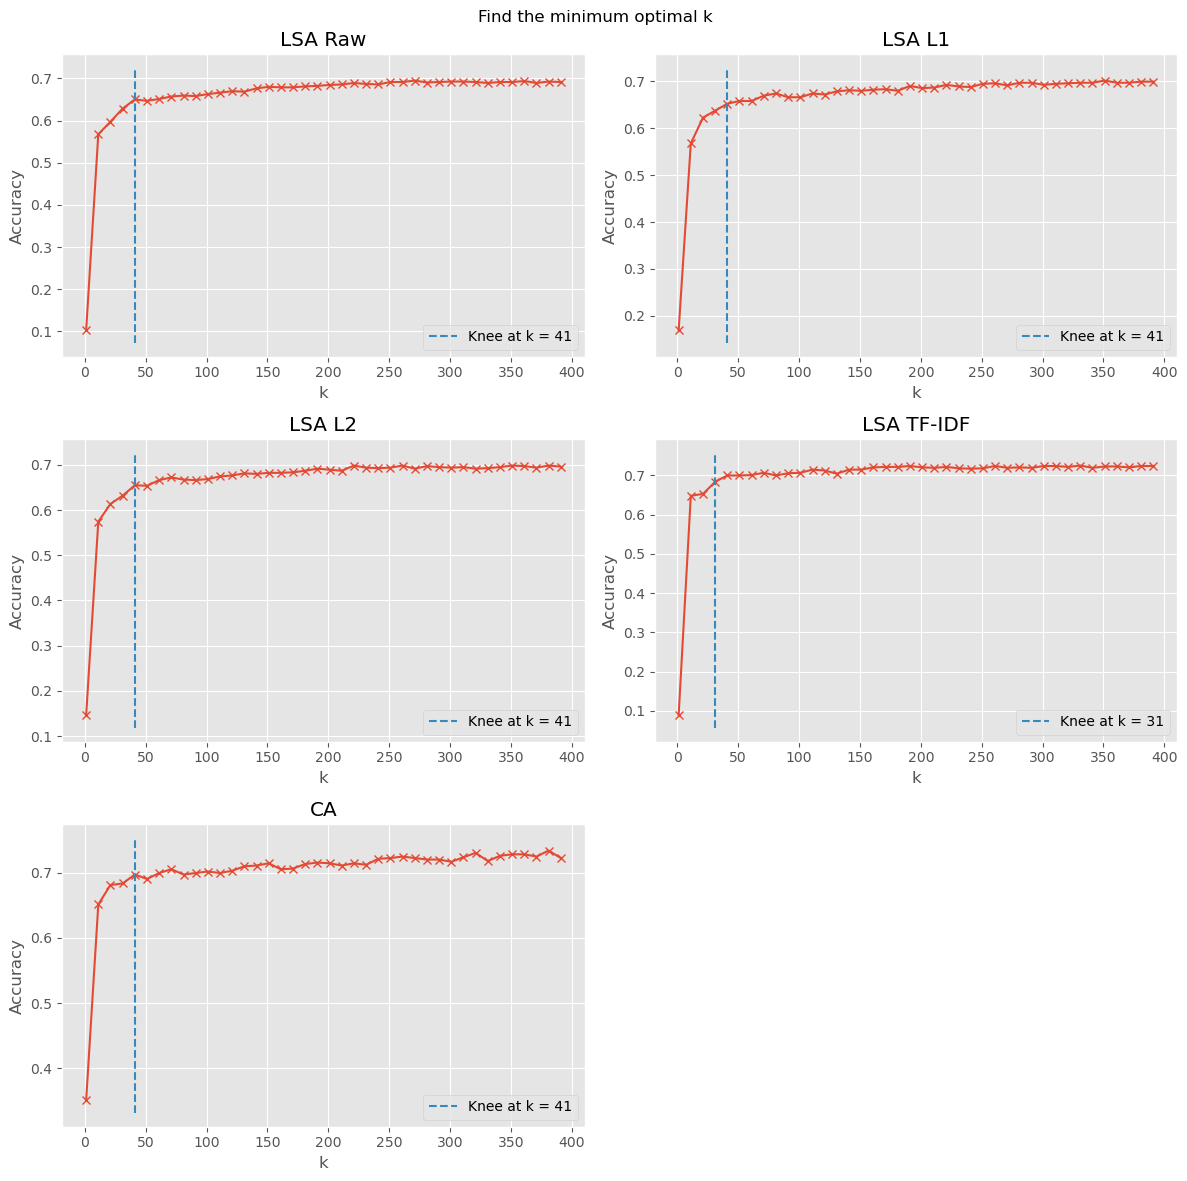

In [ ]:
from kneed import KneeLocator

# Suppress plt warnings
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,12))
plt.suptitle('Find the minimum optimal k')
plt.subplot(3,2,1)
plt.title('LSA Raw')
kl = KneeLocator(kappa, lsa_raw_accuracies, curve='concave', direction='increasing') # Use KneeLocator to find the elbow point
plt.plot(kappa, lsa_raw_accuracies, 'bx-', c=colors[0]);
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], 
           linestyles='dashed', 
           label='Knee at k = %d' % kl.knee, color=colors[1]);
plt.xlabel('k'); plt.ylabel('Accuracy');
plt.legend(loc='lower right');

kl = KneeLocator(kappa, lsa_l1_accuracies, curve='concave', direction='increasing') # Use KneeLocator to find the elbow point
plt.subplot(3,2,2)
plt.title('LSA L1')
plt.plot(kappa, lsa_l1_accuracies, 'bx-', c=colors[0]);
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], 
           linestyles='dashed', 
           label='Knee at k = %d' % kl.knee, color=colors[1]);
plt.xlabel('k'); plt.ylabel('Accuracy');
plt.legend(loc='lower right');

kl = KneeLocator(kappa, lsa_l2_accuracies, curve='concave', direction='increasing') # Use KneeLocator to find the elbow point
plt.subplot(3,2,3)
plt.title('LSA L2')
plt.plot(kappa, lsa_l2_accuracies, 'bx-', c=colors[0]);
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], 
           linestyles='dashed', 
           label='Knee at k = %d' % kl.knee, color=colors[1]);
plt.xlabel('k'); plt.ylabel('Accuracy');
plt.legend(loc='lower right');

kl = KneeLocator(kappa, lsa_tfidf_accuracies, curve='concave', direction='increasing') # Use KneeLocator to find the elbow point
plt.subplot(3,2,4)
plt.title('LSA TF-IDF')
plt.plot(kappa, lsa_tfidf_accuracies, 'bx-', c=colors[0]);
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], 
           linestyles='dashed', 
           label='Knee at k = %d' % kl.knee, color=colors[1]);
plt.xlabel('k'); plt.ylabel('Accuracy');
plt.legend(loc='lower right');

kl = KneeLocator(kappa, ca_accuracies, curve='concave', direction='increasing') # Use KneeLocator to find the elbow point
plt.subplot(3,2,5)
plt.title('CA')
plt.plot(kappa, ca_accuracies, 'bx-', c=colors[0]);
plt.vlines(kl.knee, plt.ylim()[0], plt.ylim()[1], 
           linestyles='dashed', 
           label='Knee at k = %d' % kl.knee, color=colors[1]);
plt.xlabel('k'); plt.ylabel('Accuracy');
plt.legend(loc='lower right');

plt.tight_layout();
plt.show();

In [ ]:
optimal_k_scores = [lsa_raw_accuracies[4], lsa_l1_accuracies[4], lsa_l2_accuracies[4], lsa_tfidf_accuracies[3], ca_accuracies[4]]
ks = ['k = 41', 'k = 41', 'k = 41', 'k = 31', 'k = 41']
methods = ['LSA Raw', 'LSA L1', 'LSA L2', 'LSA TF-IDF', 'CA']

accDF_Area = pd.DataFrame({
    'Method': methods,
    'Optimal k': ks,
    'Accuracy': optimal_k_scores
})

accDF_Area

,Method,Optimal k,Accuracy
0,LSA Raw,k = 41,0.650229
1,LSA L1,k = 41,0.652523
2,LSA L2,k = 41,0.654817
3,LSA TF-IDF,k = 31,0.683486
4,CA,k = 41,0.697248


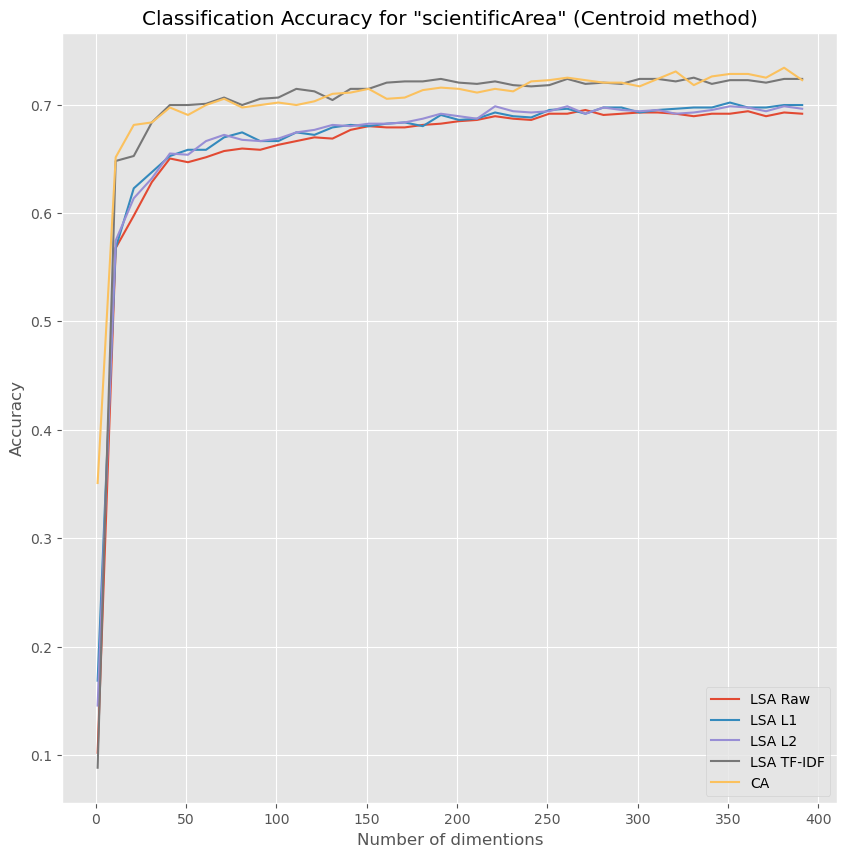

In [ ]:
# Suppress plt warnings
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,10))
plt.title('Classification Accuracy for "scientificArea" (Centroid method)')
plt.plot(kappa, lsa_raw_accuracies, c=colors[0], label='LSA Raw');
plt.plot(kappa, lsa_l1_accuracies, c=colors[1], label='LSA L1');
plt.plot(kappa, lsa_l2_accuracies, c=colors[2], label='LSA L2');
plt.plot(kappa, lsa_tfidf_accuracies, c=colors[3], label='LSA TF-IDF');
plt.plot(kappa, ca_accuracies, c=colors[4], label='CA');
plt.xlabel('Number of dimentions'); plt.ylabel('Accuracy');
plt.legend()
plt.show();

**Correspondence Analysis (CA)** marginally outperforms the second-best **LSA** with TF-IDF vectorization.

## Classification for scientificField

In [ ]:
original_df = df.copy()

In [ ]:
df = original_df[['text', 'label_Field']].copy()
df.columns = ['text', 'label']

In [ ]:
df.label.value_counts()

label
5.2 Computer And Information Science                                     243
3.8 Applied Medical Technologie Diagnostic Therapie And Public Health    201
6.2 Economic And Busine                                                  193
2.2 Electrical Electronic Communication Engineering                      169
3.6 Oncology And Cancer Research                                         150
                                                                        ... 
1.6 Other Physical Natural Science                                         4
4.8 Applied Technologie Diagnostic Public Health                           3
9.5 Globalization Of Innovation Global Value Chain And Catch Up Proce      3
5.3 Other Mathematic                                                       2
4.5 Ecology Synthetic Biology                                              1
Name: count, Length: 80, dtype: int64

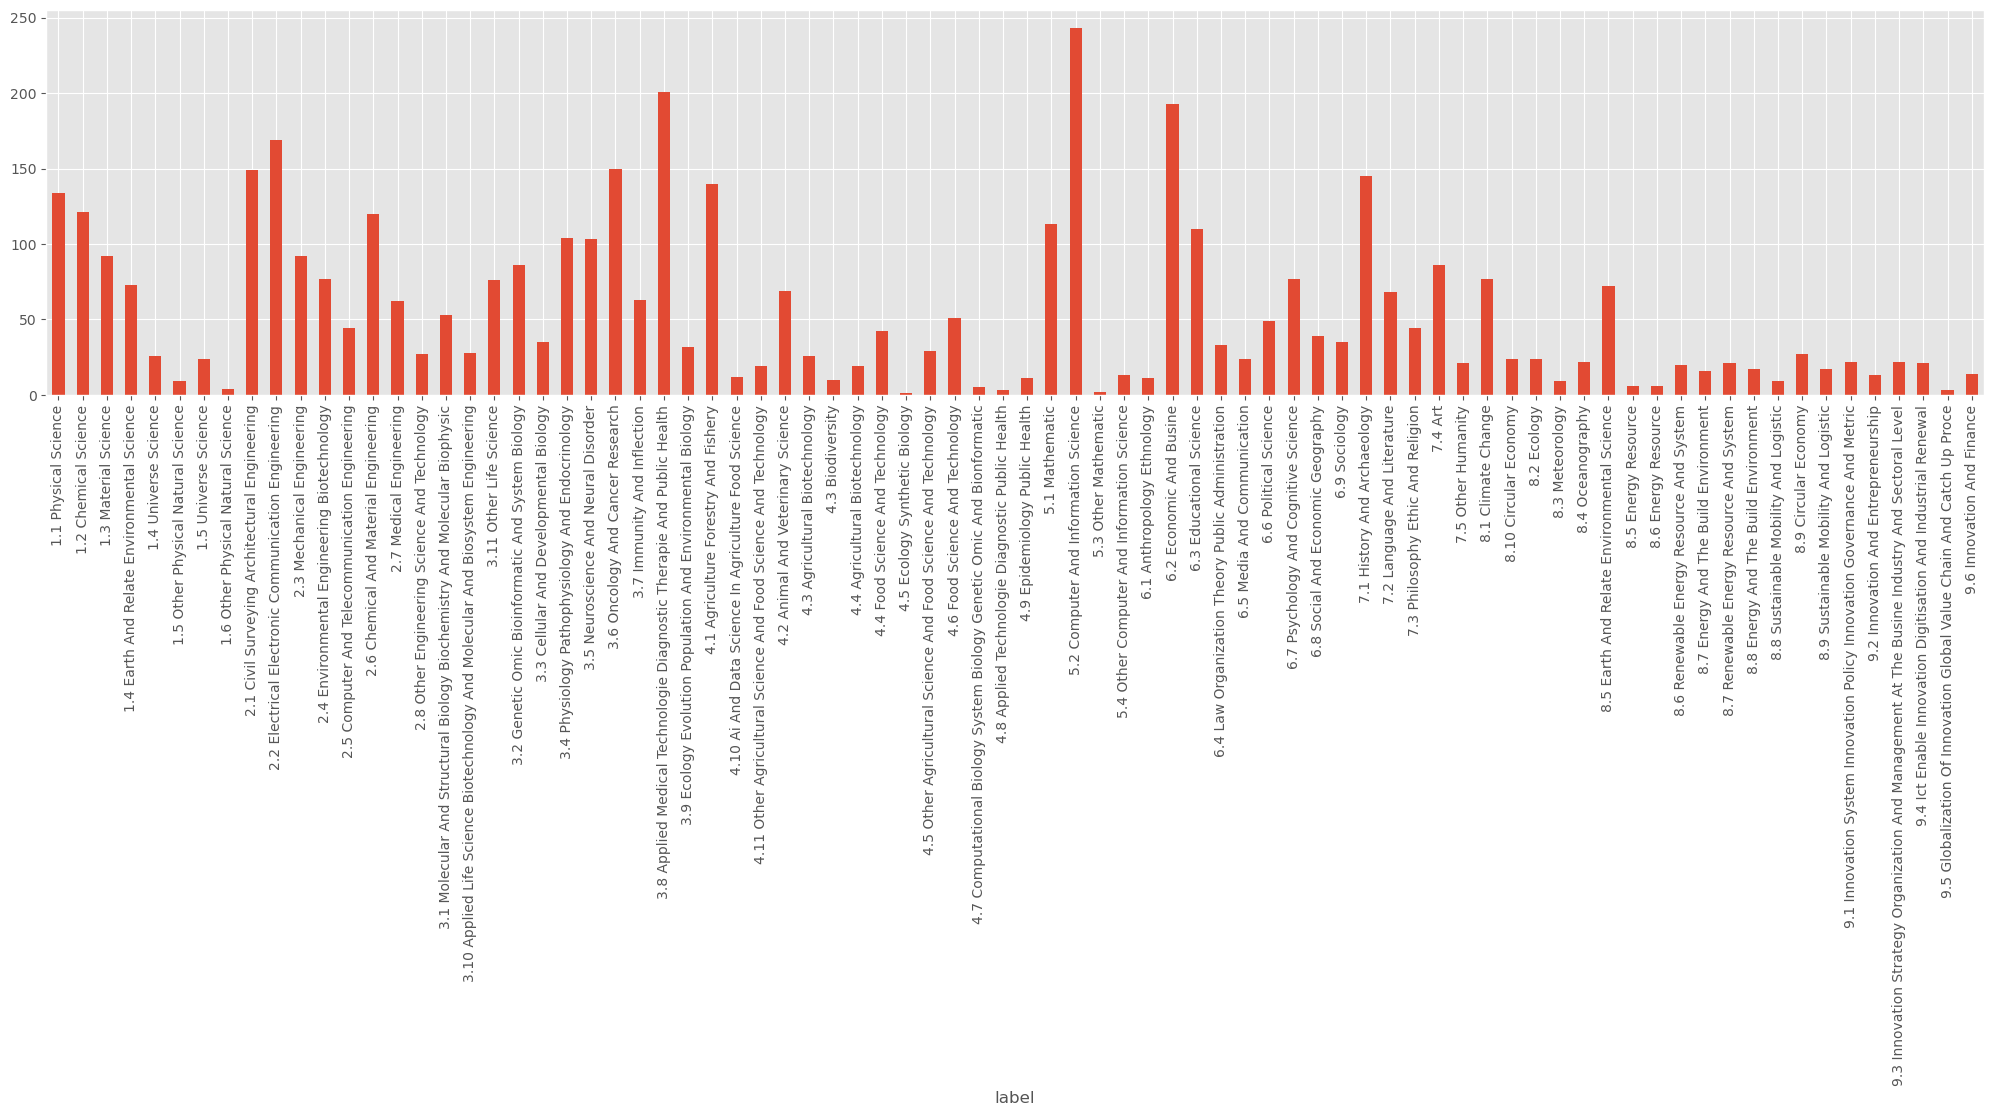

In [ ]:
df.label.value_counts().sort_index().plot.bar(figsize=(25,5));

> From the above, we notice that there are classes with only one occurrence. These should not end up in the *test* split because it will be impossible for the model to predict them. As such, we perform a stratified split on the rest of the DataFrame and add the single-occurrence classes manually to the *train* split.

In [ ]:
def stratified_split_with_single_occurrences(df, target_col):
    '''Custom train-test-split for datasets with single occurrence classes'''
    # Identify classes with only one occurrence
    value_counts = df[target_col].value_counts()
    single_occurrence_classes = value_counts[value_counts == 1].index

    # Separate the single occurrence classes
    single_occurrence_df = df[df[target_col].isin(single_occurrence_classes)]
    remaining_df = df[~df[target_col].isin(single_occurrence_classes)]

    # Perform a stratified split on the remaining data
    train_df, test_df = train_test_split(
        remaining_df,
        test_size=0.2,  # Adjust test_size as needed
        stratify=remaining_df[target_col],
        random_state=42
    )

    # Combine the single occurrence classes with the train set
    train_df = pd.concat([train_df, single_occurrence_df], axis=0)

    return train_df, test_df

In [ ]:
# Train test split the df
train_df, test_df = stratified_split_with_single_occurrences(df, 'label')

In [ ]:
train_df

,text,label
id,,
25204,propose project aim research develop set educa...,6.3 Educational Science
25974,integrate advanced artificial intelligence ai ...,5.2 Computer And Information Science
26672,advance personalized radiotherapy biomarker gu...,3.6 Oncology And Cancer Research
2556,neurodevelopmental disorders ndds common chron...,3.5 Neuroscience And Neural Disorder
3068,hydrogel polymeric material compose polymer ch...,1.3 Material Science
...,...,...
25525,ecultour month project aim exploit potential i...,8.9 Sustainable Mobility And Logistic
25307,objective gameivr critically approach ivr game...,5.2 Computer And Information Science
3199,cutaneous squamous cell carcinoma cscc second ...,3.6 Oncology And Cancer Research


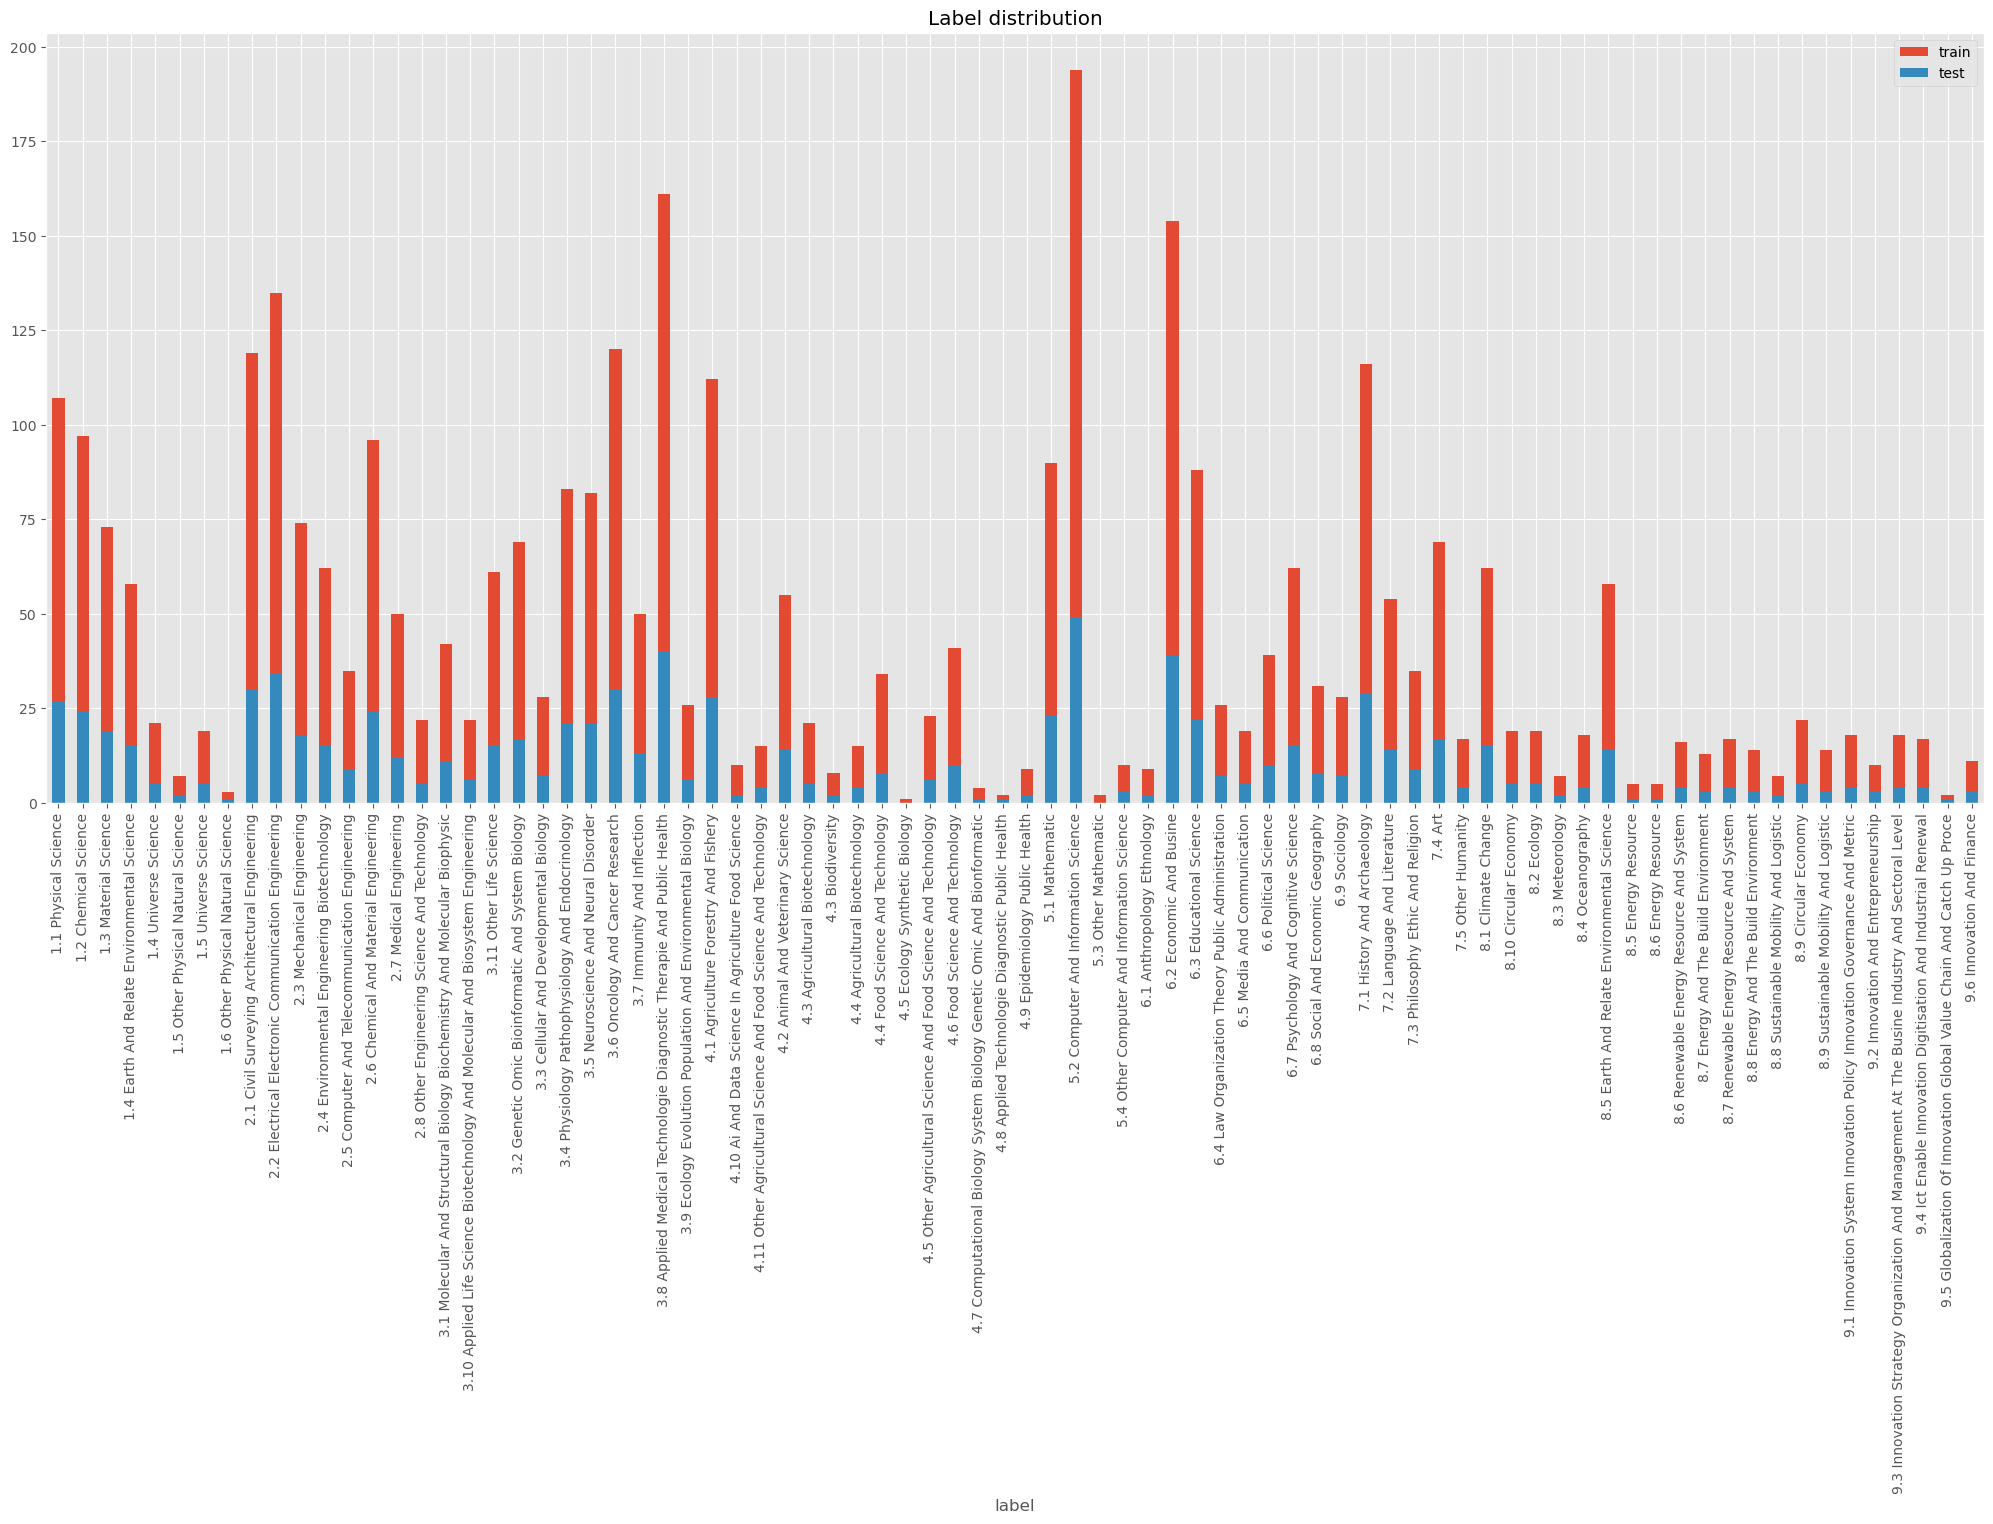

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Get the ggplot color palette

plt.subplot(1,1,1)
plt.title('Label distribution')
train_df.label.value_counts().sort_index().plot.bar(figsize=(25,10), color=colors[0], label='train')
test_df.label.value_counts().sort_index().plot.bar(figsize=(25,10), color=colors[1], label='test')
plt.legend()
plt.show()


In [ ]:
k = 41 # components

## LSA_RAW
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm=None, use_idf=False)),
    ('svd', TruncatedSVD(n_components=k, random_state=42)),
    ('clf', NearestCentroid())
])
# Fit the pipeline
pipeline.fit(train_df.text, train_df.label)
y_pred = pipeline.predict(test_df.text)
# Evaluate the predictions
lsa_raw_accuracy = accuracy_score(test_df.label, y_pred)

## LSA_L1
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm='l1', use_idf=False)),
    ('svd', TruncatedSVD(n_components=k, random_state=42)),
    ('clf', NearestCentroid())
])
# Fit the pipeline
pipeline.fit(train_df.text, train_df.label)
y_pred = pipeline.predict(test_df.text)
# Evaluate the predictions
lsa_l1_accuracy = accuracy_score(test_df.label, y_pred)

# LSA_L2
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm='l2', use_idf=False)),
    ('svd', TruncatedSVD(n_components=k, random_state=42)),
    ('clf', NearestCentroid())
])
# Fit the pipeline
pipeline.fit(train_df.text, train_df.label)
y_pred = pipeline.predict(test_df.text)
# Evaluate the predictions
lsa_l2_accuracy = accuracy_score(test_df.label, y_pred)

## LSA_TFIDF
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, use_idf=True)),
    ('svd', TruncatedSVD(n_components=k, random_state=42)),
    ('clf', NearestCentroid())
])
# Fit the pipeline
pipeline.fit(train_df.text, train_df.label)
y_pred = pipeline.predict(test_df.text)
# Evaluate the predictions
lsa_tfidf_accuracy = accuracy_score(test_df.label, y_pred)

ca_accyracy = calculate_CA_accuracies(k)

In [ ]:
optimal_k_scores = [lsa_raw_accuracy, lsa_l1_accuracy, lsa_l2_accuracy, lsa_tfidf_accuracy, ca_accyracy]
ks = ['k = 41', 'k = 41', 'k = 41', 'k = 31', 'k = 41']
methods = ['LSA Raw', 'LSA L1', 'LSA L2', 'LSA TF-IDF', 'CA']

accDF_Field = pd.DataFrame({
    'Method': methods,
    'Optimal k': ks,
    'Accuracy': optimal_k_scores
})

accDF_Field

,Method,Optimal k,Accuracy
0,LSA Raw,k = 41,0.291284
1,LSA L1,k = 41,0.292431
2,LSA L2,k = 41,0.302752
3,LSA TF-IDF,k = 31,0.355505
4,CA,k = 41,0.375431


## Classification for scientific-SubField

In [ ]:
df = original_df[['text', 'label_SubField']].copy()
df.columns = ['text', 'label']
# Replace 'Nan' values with np.nan
df.label = df.label.replace('Nan', np.nan)
# Drop rows with NaN values
df.dropna(subset=['label'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3993 entries, 2398 to 25562
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   text    3993 non-null   object  
 1   label   3993 non-null   category
dtypes: category(1), object(1)
memory usage: 89.6+ KB


In [ ]:
for i,j in df.label.value_counts().items():
    print(i,j)

3.6.1 Cancer Biology 65
2.2.1 Electrical And Electronic Engineering 65
5.2.11 Machine Learning And Datum Processing 64
3.8.2 Diagnosi And Treatment Of Disease 62
3.6.3 Cancer Treatment Research 58
3.5.7 Neurological And Psychiatric Disorder 55
3.8.1 Diagnostic Tool 54
2.7.3 Biomedical Engineering 47
4.1.1 Agriculture 46
2.1.1 Civil Engineering 46
1.2.5 Organic Chemistry 46
6.2.1 Economic 44
6.2.3 Management Marketing 44
3.8.3 Epidemiology And Public Health 43
6.2.4 Quantitative Method To Economic And Busine 38
3.4.7 Cardiovascular Disease 38
2.4.1 Environmental Engineering 37
1.1.11 Particle And Field Physic 37
6.2.5 Sustainable Growth Economic Alternative 36
4.2.4 Other Animal And Veterinary Science 35
1.3.3 Functional And Advanced Material 35
6.3.2 New Technology In Education 35
2.6.5 Material Engineering 34
2.2.3 Communication Engineering And System 33
2.5.1 Information And Intelligent System Engineering 33
7.4.3 Perform Art Study 32
3.7.1 The Immune System And Related Disorder 32
6

> From the above, we notice that there are classes with only one occurrence. These should not end up in the *test* split because it will be impossible for the model to predict them. As such, we perform a stratified split on the rest of the DataFrame and add the single-occurrence classes manually to the *train* split.

In [ ]:
# Train test split the df
train_df, test_df = stratified_split_with_single_occurrences(df, 'label')

In [ ]:
train_df

,text,label
id,,
3142,recent year interest impact weather human heal...,8.3.5 Environmental Meteorology
25144,face social reproduction crisis socio economic...,6.9.1 Apply Sociology
23263,advent immunotherapy showcase significance imm...,3.6.3 Cancer Treatment Research
26897,background multidrug resistance mdr threat glo...,3.10.5 Synthetic And Chemical Biology
2649,important role biochemical cellular process pr...,3.2.9 Bioinformatic
...,...,...
26476,flood destructive water relate hazard flood di...,8.5.4 Hydrology
25136,sustainable transportation sit heart european ...,8.6.2 Energy Grid
25839,foundation design construction critical aspect...,8.7.5 Wind Energy


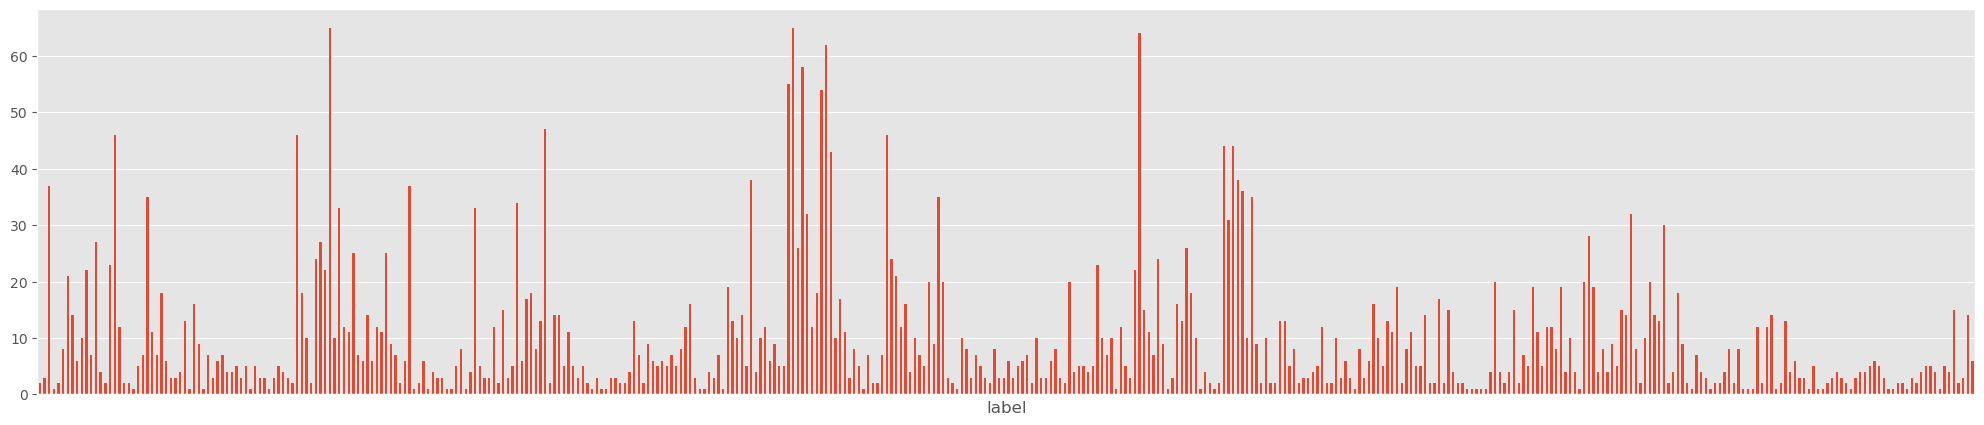

In [ ]:
df.label.value_counts().sort_index().plot.bar(figsize=(25,5));
plt.xticks([]);

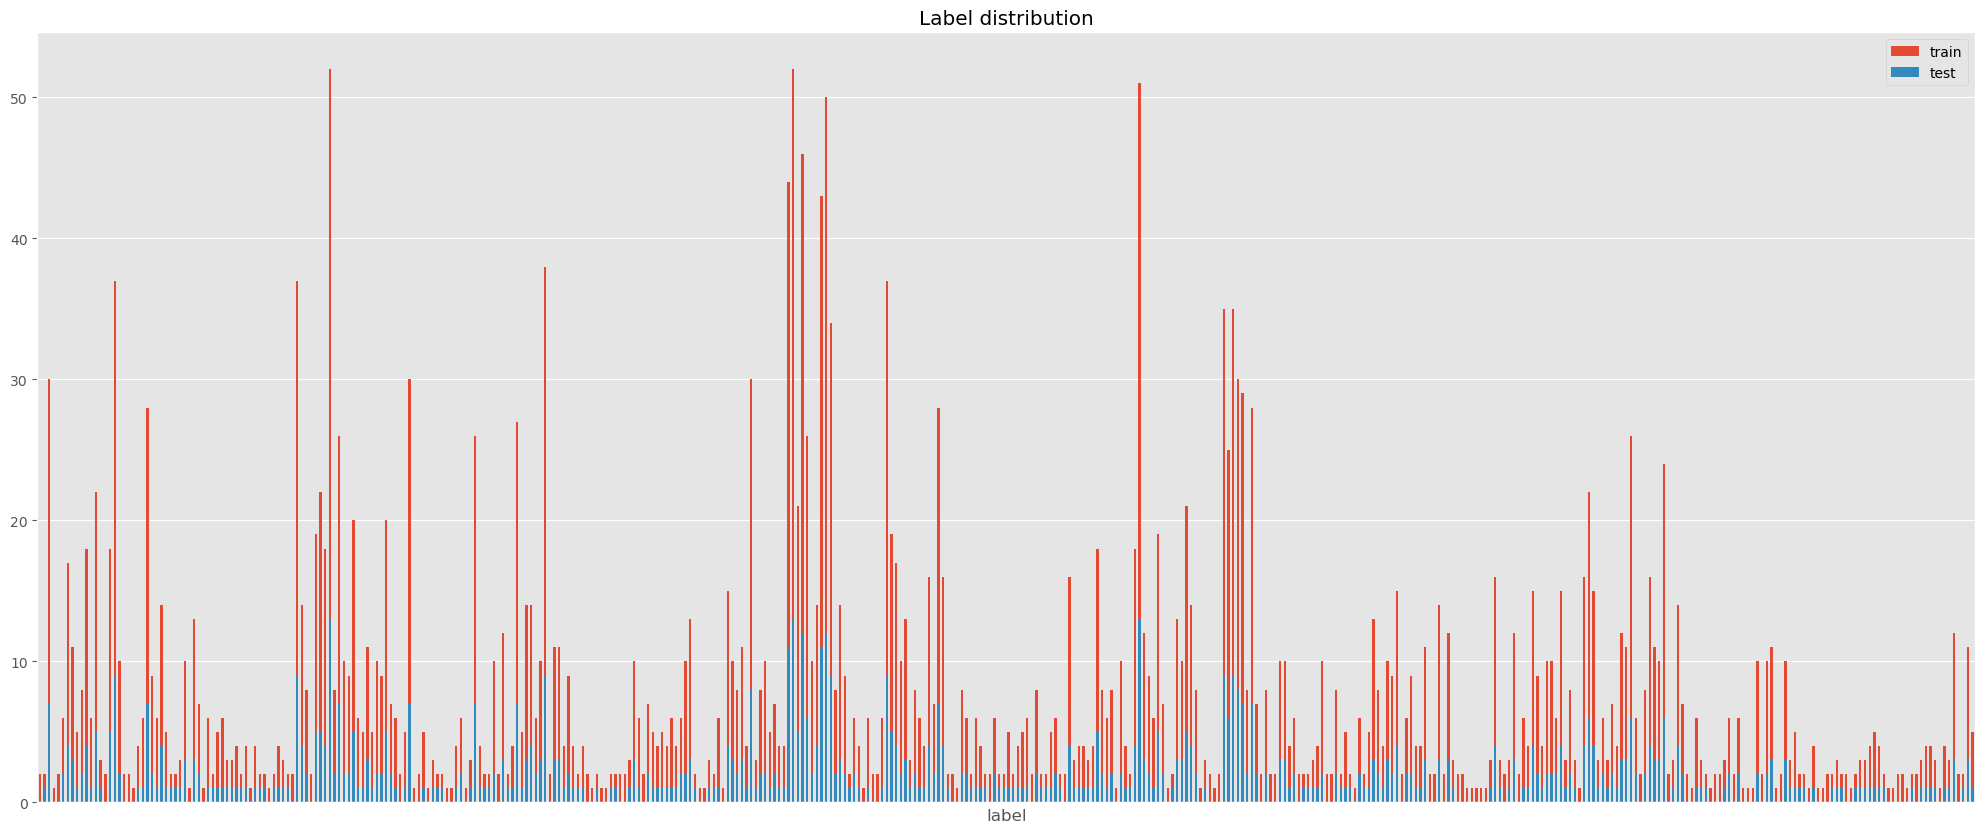

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Get the ggplot color palette

plt.subplot(1,1,1)
plt.title('Label distribution')
train_df.label.value_counts().sort_index().plot.bar(figsize=(25,10), color=colors[0], label='train')
test_df.label.value_counts().sort_index().plot.bar(figsize=(25,10), color=colors[1], label='test')
plt.xticks([]);
plt.legend()
plt.show()


In [ ]:
k = 41 # components

## LSA_RAW
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm=None, use_idf=False)),
    ('svd', TruncatedSVD(n_components=k, random_state=42)),
    ('clf', NearestCentroid())
])
# Fit the pipeline
pipeline.fit(train_df.text, train_df.label)
y_pred = pipeline.predict(test_df.text)
# Evaluate the predictions
lsa_raw_accuracy = accuracy_score(test_df.label, y_pred)

## LSA_L1
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm='l1', use_idf=False)),
    ('svd', TruncatedSVD(n_components=k, random_state=42)),
    ('clf', NearestCentroid())
])
# Fit the pipeline
pipeline.fit(train_df.text, train_df.label)
y_pred = pipeline.predict(test_df.text)
# Evaluate the predictions
lsa_l1_accuracy = accuracy_score(test_df.label, y_pred)

# LSA_L2
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, norm='l2', use_idf=False)),
    ('svd', TruncatedSVD(n_components=k, random_state=42)),
    ('clf', NearestCentroid())
])
# Fit the pipeline
pipeline.fit(train_df.text, train_df.label)
y_pred = pipeline.predict(test_df.text)
# Evaluate the predictions
lsa_l2_accuracy = accuracy_score(test_df.label, y_pred)

## LSA_TFIDF
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=10, lowercase=False, use_idf=True)),
    ('svd', TruncatedSVD(n_components=k, random_state=42)),
    ('clf', NearestCentroid())
])
# Fit the pipeline
pipeline.fit(train_df.text, train_df.label)
y_pred = pipeline.predict(test_df.text)
# Evaluate the predictions
lsa_tfidf_accuracy = accuracy_score(test_df.label, y_pred)

ca_accyracy = calculate_CA_accuracies(k)

In [ ]:
optimal_k_scores = [lsa_raw_accuracy, lsa_l1_accuracy, lsa_l2_accuracy, lsa_tfidf_accuracy, ca_accyracy]
ks = ['k = 41', 'k = 41', 'k = 41', 'k = 31', 'k = 41']
methods = ['LSA Raw', 'LSA L1', 'LSA L2', 'LSA TF-IDF', 'CA']

accDF_SubField = pd.DataFrame({
    'Method': methods,
    'Optimal k': ks,
    'Accuracy': optimal_k_scores
})

accDF_SubField

,Method,Optimal k,Accuracy
0,LSA Raw,k = 41,0.129114
1,LSA L1,k = 41,0.145570
2,LSA L2,k = 41,0.146835
3,LSA TF-IDF,k = 31,0.202532
4,CA,k = 41,0.249683


---
## Classification Conclusions
From the following table, we can see that as the classification task becomes increasingly difficult *(the number of classes increases and the number of training documents decreases)*, the margin by which **Correspondence Analysis (CA)** outperforms the other methods increases, making CA a strong competitor in such NLP tasks.

In [ ]:
accuracies_df = pd.DataFrame({
    'Method': methods,
    'Optimal k': ks,
    'scientificArea Accuracy': accDF_Area.Accuracy,
    'scientificField Accuracy': accDF_Field.Accuracy,
    'scientificAreaField Accuracy': accDF_SubField.Accuracy
})
accuracies_df.set_index('Method', inplace=True)
accuracies_df

,Optimal k,scientificArea Accuracy,scientificField Accuracy,scientificAreaField Accuracy
Method,,,,
LSA Raw,k = 41,0.650229,0.291284,0.129114
LSA L1,k = 41,0.652523,0.292431,0.145570
LSA L2,k = 41,0.654817,0.302752,0.146835
LSA TF-IDF,k = 31,0.683486,0.355505,0.202532
CA,k = 41,0.697248,0.375431,0.249683


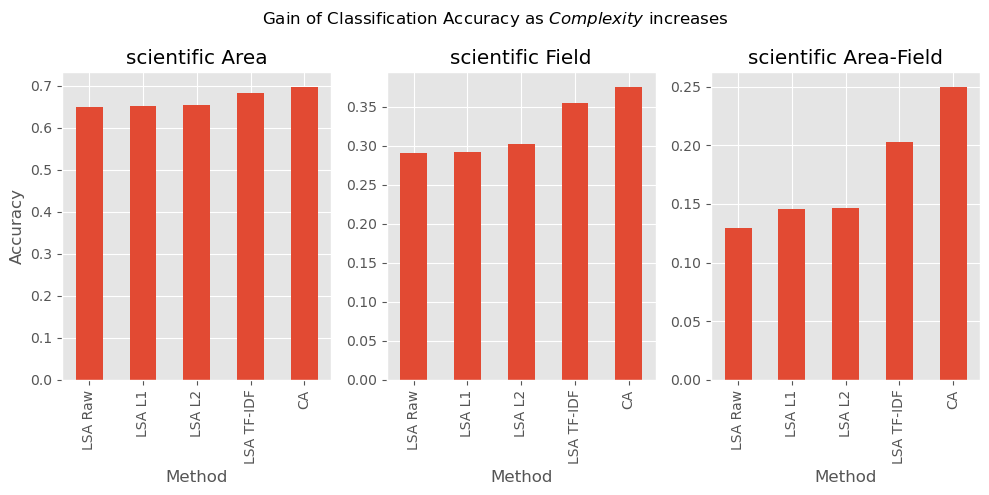

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Gain of Classification Accuracy as $\it{Complexity}$ increases')
plt.subplot(1,3,1)
plt.ylabel('Accuracy')
plt.title('scientific Area')
accuracies_df['scientificArea Accuracy'].plot.bar()
plt.subplot(1,3,2)
plt.title('scientific Field')
accuracies_df['scientificField Accuracy'].plot.bar()
plt.subplot(1,3,3)
plt.title('scientific Area-Field')
accuracies_df['scientificAreaField Accuracy'].plot.bar()
plt.tight_layout()
plt.show();

# Hierarchical Classification 
---
In this section, we will try to improve the classification accuracy by hierarchically classifying each document, first into a scientific area, then into one of the area's fields, and lastly into one of the field's subfields, using the algorithm [Local Classifier Per Node](https://hiclass.readthedocs.io/en/latest/algorithms/local_classifier_per_node.html).

In [ ]:
# !pip install hiclass
# !pip install hiclass ray

In [ ]:
df = pd.read_pickle(data/'papers_df.pkl')
# replace 'Nan' values in df.label_SubField with nan
# df = df.replace('Nan', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 2397 to 25562
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   text            4359 non-null   object  
 1   label           4359 non-null   category
 2   label_Field     4359 non-null   category
 3   label_SubField  4359 non-null   category
dtypes: category(3), object(1)
memory usage: 89.1+ KB


In [ ]:
df.head()

,text,label,label_Field,label_SubField
id,,,,
2397,project aim develop innovative solution manage...,SA1. Natural Sciences,1.4 Earth And Relate Environmental Science,Nan
2398,optical microscopy constitute fundamental para...,SA1. Natural Sciences,1.1 Physical Science,1.1.8 Optic
2399,parkinson disease pd neurodegenerative disorde...,SA2. Engineering Sciences & Technology,2.7 Medical Engineering,2.7.3 Biomedical Engineering
2401,bentonite clay widely low cost additive drilli...,SA8. Environment & Energy,8.5 Energy Resource,8.5.1 Fossil And Nuclear Energy
2402,quantum information theory qit generalization ...,SA1. Natural Sciences,1.6 Other Physical Natural Science,Nan


In [ ]:
def stratified_split_with_single_occurrences(df, target_col):
    '''Custom train-test-split for datasets with single occurrence classes.
    These should not end up in the *test* split because it will be impossible for the model to predict them. 
    As such, we perform a stratified split on the rest of the DataFrame and add the single-occurrence classes manually to the *train* split.
    '''

    # Identify classes with only one occurrence
    value_counts = df[target_col].value_counts()
    single_occurrence_classes = value_counts[value_counts == 1].index

    # Separate the single occurrence classes
    single_occurrence_df = df[df[target_col].isin(single_occurrence_classes)]
    remaining_df = df[~df[target_col].isin(single_occurrence_classes)]

    # Perform a stratified split on the remaining data
    train_df, test_df = train_test_split(
        remaining_df,
        test_size=0.2,  # Adjust test_size as needed
        stratify=remaining_df[target_col],
        random_state=42
    )

    # Combine the single occurrence classes with the train set
    train_df = pd.concat([train_df, single_occurrence_df], axis=0)

    return train_df, test_df

In [ ]:
# Train test split the df
train_df, test_df = stratified_split_with_single_occurrences(df, 'label_SubField')

In [ ]:
train_df.shape

(3496, 4)

In [ ]:
n_components = 41

# Vectorize
VEC_CA = CountVectorizer(min_df=10, lowercase=False)
X_train = VEC_CA.fit_transform(train_df.text)
X_test = VEC_CA.transform(test_df.text)

# Preprocess
X_train = pd.DataFrame(X_train.toarray(), columns=VEC_CA.get_feature_names_out(), index=train_df.index).fillna(0) # 'prince' library expects a contingency table
X_train = X_train.loc[(X_train != 0).any(axis=1)]
X_test = pd.DataFrame(X_test.toarray(), columns=VEC_CA.get_feature_names_out(), index=test_df.index).fillna(0) # 'prince' library expects a contingency table
X_test = X_test.loc[(X_test != 0).any(axis=1)]

# Fit
ca = prince.CA(n_components=n_components, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
ca.fit(X_train) # Fit on the training data
U_train_ca = ca.row_coordinates(X_train) # Project the training data
U_test_ca = ca.row_coordinates(X_test) # Project the test data

# Filter the labels to match the row coordinates
y_true_train = train_df[train_df.index.isin(U_train_ca.index)][['label', 'label_Field','label_SubField']]
y_true_test = test_df[test_df.index.isin(U_test_ca.index)][['label', 'label_Field','label_SubField']]


In [ ]:
y_true_test.head()

,label,label_Field,label_SubField
id,,,
25003,SA8. Environment & Energy,8.2 Ecology,8.2.1 Molecular Ecology
3535,SA4. Agricultural Sciences – Food Science & Te...,4.1 Agriculture Forestry And Fishery,4.1.1 Agriculture
3575,SA6. Social Sciences,6.7 Psychology And Cognitive Science,6.7.1 Clinical Counseling Psychology
4366,SA7. Humanities & Arts,7.1 History And Archaeology,7.1.1 Classical Archaeology
4276,SA3. Life Sciences (Medical & Health Sciences),3.6 Oncology And Cancer Research,Nan


In [ ]:
from hiclass import LocalClassifierPerNode
from hiclass import metrics
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier and algorithm
rf = RandomForestClassifier()
classifier = LocalClassifierPerNode(local_classifier=rf)
# Fit
classifier.fit(U_train_ca, y_true_train)
# Predict
predictions = classifier.predict(U_test_ca)

In [ ]:
predictions = pd.DataFrame(predictions, columns=['label', 'label_Field','label_SubField'], index=y_true_test.index)

In [ ]:
# Concatenate the two dataframes
temp = pd.concat([y_true_test, predictions], axis=1)
temp

,label,label_Field,label_SubField,label,label_Field,label_SubField
id,,,,,,
25003,SA8. Environment & Energy,8.2 Ecology,8.2.1 Molecular Ecology,SA2. Engineering Sciences & Technology,2.4 Environmental Engineering Biotechnology,2.4.4 Bioprocessing Technology Biocatalysi
3535,SA4. Agricultural Sciences – Food Science & Te...,4.1 Agriculture Forestry And Fishery,4.1.1 Agriculture,SA4. Agricultural Sciences – Food Science & Te...,4.1 Agriculture Forestry And Fishery,4.1.1 Agriculture
3575,SA6. Social Sciences,6.7 Psychology And Cognitive Science,6.7.1 Clinical Counseling Psychology,SA6. Social Sciences,6.7 Psychology And Cognitive Science,6.7.1 Clinical Counseling Psychology
4366,SA7. Humanities & Arts,7.1 History And Archaeology,7.1.1 Classical Archaeology,SA7. Humanities & Arts,7.1 History And Archaeology,7.1.3 Archaeometry
4276,SA3. Life Sciences (Medical & Health Sciences),3.6 Oncology And Cancer Research,Nan,SA3. Life Sciences (Medical & Health Sciences),3.8 Applied Medical Technologie Diagnostic The...,3.8.2 Diagnosi And Treatment Of Disease
...,...,...,...,...,...,...
26601,SA5. Mathematics & Information Sciences,5.1 Mathematic,5.1.10 Probability And Statistic,SA3. Life Sciences (Medical & Health Sciences),3.8 Applied Medical Technologie Diagnostic The...,3.8.2 Diagnosi And Treatment Of Disease
25056,SA6. Social Sciences,6.2 Economic And Busine,6.2.3 Management Marketing,SA6. Social Sciences,6.2 Economic And Busine,6.2.3 Management Marketing
3468,SA2. Engineering Sciences & Technology,2.6 Chemical And Material Engineering,2.6.8 Catalysi,SA1. Natural Sciences,1.2 Chemical Science,1.2.2 Apply And Industrial Chemistry


In [ ]:
# Check which instances were classified correclty
correctly_classified = (y_true_test == predictions).all(axis=1)
for i,j in correctly_classified.items():
    print(i,j)

25003 False
3535 True
3575 True
4366 False
4276 False
25208 False
4370 False
4501 False
26372 True
2895 False
23539 False
4056 False
23504 False
25837 False
2902 False
4066 True
3721 False
24767 False
25532 False
26768 False
3727 False
25582 False
3497 True
26080 False
23358 True
24937 True
23690 False
25608 False
25877 True
4450 False
25072 True
25142 False
26428 False
26542 False
3234 True
25886 False
4852 True
24788 False
24839 False
3887 True
25611 False
3984 False
2771 False
4263 True
26387 False
4776 False
4701 False
25623 True
3916 False
3517 False
4283 True
24863 False
4375 True
4244 False
4631 False
25581 False
26609 False
3713 False
25918 False
3838 True
4312 True
3897 False
26397 False
26641 True
25704 False
4100 False
4265 False
3035 False
4589 False
4555 False
4273 True
26865 False
4040 True
25994 False
24952 False
3363 True
26007 False
25398 False
26568 True
2707 False
4330 False
26086 False
26573 False
4264 False
3090 True
25783 False
23679 True
26073 False
3031 False
26

### Metrics

In [ ]:
# Metrics for SubField
precision_subfield = metrics.precision(y_true_test, predictions) * 100
recall_subfield = metrics.recall(y_true_test, predictions) * 100
f1_subfield = metrics.f1(y_true_test, predictions) * 100
accuracy_subfield = (y_true_test == predictions).all(axis=1).mean() * 100

# Metrics for Field
precision_field = metrics.precision(y_true_test.iloc[:, :2], predictions.iloc[:, :2]) * 100
recall_field = metrics.recall(y_true_test.iloc[:, :2], predictions.iloc[:, :2]) * 100
f1_field = metrics.f1(y_true_test.iloc[:, :2], predictions.iloc[:, :2]) * 100
accuracy_field = (y_true_test.iloc[:, :2] == predictions.iloc[:, :2]).all(axis=1).mean() * 100

# Metrics for Area
precision_area = metrics.precision(y_true_test.iloc[:, :1], predictions.iloc[:, :1]) * 100
recall_area = metrics.recall(y_true_test.iloc[:, :1], predictions.iloc[:, :1]) * 100
f1_area = metrics.f1(y_true_test.iloc[:, :1], predictions.iloc[:, :1]) * 100
accuracy_area = (y_true_test.iloc[:, :1] == predictions.iloc[:, :1]).all(axis=1).mean() * 100

# Create DataFrame
metrics_df = pd.DataFrame({
    'Area': [accuracy_area, precision_area, recall_area, f1_area],
    'Field': [accuracy_field, precision_field, recall_field, f1_field],
    'Subfield': [accuracy_subfield, precision_subfield, recall_subfield, f1_subfield]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 score'])

# Format as percentage with three decimal places
metrics_df = metrics_df.map(lambda x: f"{x:.3f}%")

print("Metrics for classification using CA with 41 components")
metrics_df

Metrics for classification using CA with 41 components


,Area,Field,Subfield
Accuracy,70.915%,43.569%,25.145%
Precision,70.915%,57.242%,46.736%
Recall,70.915%,57.242%,46.736%
F1 score,70.915%,57.242%,46.736%


> From the above metrics, we can see that using hierarchical classification has improved accuracy over the naive single-label classification, albeit only slightly. Although this improvement could be attributed to the **Random Forests Classifier**.

# Document Similarity
---

In [1]:
from pathlib import Path
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
import prince # Coordination Analysis library
from tqdm import tqdm


data = Path('data')

In [2]:
# change the default matplotlib style to 'ggplot'
plt.style.use('ggplot')

## Load texts

In [3]:
df = pd.read_pickle(data/'papers_df.pkl')
# replace 'Nan' values in df.label_SubField with nan
df = df.replace('Nan', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4359 entries, 2397 to 25562
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   text            4359 non-null   object  
 1   label           4359 non-null   category
 2   label_Field     4359 non-null   category
 3   label_SubField  3993 non-null   category
dtypes: category(3), object(1)
memory usage: 107.6+ KB


In [4]:
df.head()

,text,label,label_Field,label_SubField
id,,,,
2397,project aim develop innovative solution manage...,SA1. Natural Sciences,1.4 Earth And Relate Environmental Science,NaN
2398,optical microscopy constitute fundamental para...,SA1. Natural Sciences,1.1 Physical Science,1.1.8 Optic
2399,parkinson disease pd neurodegenerative disorde...,SA2. Engineering Sciences & Technology,2.7 Medical Engineering,2.7.3 Biomedical Engineering
2401,bentonite clay widely low cost additive drilli...,SA8. Environment & Energy,8.5 Energy Resource,8.5.1 Fossil And Nuclear Energy
2402,quantum information theory qit generalization ...,SA1. Natural Sciences,1.6 Other Physical Natural Science,NaN


In [5]:
n_components = 500

# Vectorize
VEC_CA = CountVectorizer(min_df=10, lowercase=False)
X = VEC_CA.fit_transform(df.text)

# Preprocess
X = pd.DataFrame(X.toarray(), columns=VEC_CA.get_feature_names_out(), index=df.index).fillna(0) # 'prince' library expects a contingency table
X = X.loc[(X != 0).any(axis=1)]

# Fit
ca = prince.CA(n_components=n_components, n_iter=3, copy=True, check_input=True, engine='sklearn', random_state=42)
ca.fit(X) # Fit on the full data
U_ca = ca.row_coordinates(X) # Project the data

# Filter the labels to match the row coordinates
y_true = df[df.index.isin(U_ca.index)].label

In [8]:
# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(U_ca)

# Find document pairs above a similarity threshold
threshold = 0.99 
similar_pairs = np.argwhere(cosine_sim_matrix > threshold)

# Filter out self-comparisons
similar_pairs = [tuple(pair) for pair in similar_pairs if pair[0] != pair[1]]

# Create an empty DataFrame to store the results
similarity_df = pd.DataFrame(columns=["Document1", "Document2", "Cosine Similarity"])

# Print similar document pairs
for i, j in similar_pairs:
    new_row = pd.DataFrame({
        "Document1": [df.iloc[i].name],
        "Document2": [df.iloc[j].name],
        "Cosine Similarity": [f"{cosine_sim_matrix[i, j]:.3f}"]
    })
    similarity_df = pd.concat([similarity_df, new_row], ignore_index=True)
    print(f"Document {df.iloc[i].name} and Document {df.iloc[j].name} are too similar (cosine similarity: {cosine_sim_matrix[i, j]:.3f})")

Document 2398 and Document 25082 are too similar (cosine similarity: 1.000)
Document 2424 and Document 25694 are too similar (cosine similarity: 1.000)
Document 2483 and Document 26131 are too similar (cosine similarity: 1.000)
Document 2540 and Document 26554 are too similar (cosine similarity: 0.998)
Document 2604 and Document 25797 are too similar (cosine similarity: 0.991)
Document 2605 and Document 26185 are too similar (cosine similarity: 0.995)
Document 2664 and Document 23762 are too similar (cosine similarity: 1.000)
Document 2677 and Document 24921 are too similar (cosine similarity: 1.000)
Document 2689 and Document 23416 are too similar (cosine similarity: 0.993)
Document 2708 and Document 25265 are too similar (cosine similarity: 0.993)
Document 2776 and Document 25520 are too similar (cosine similarity: 0.996)
Document 2848 and Document 26654 are too similar (cosine similarity: 0.992)
Document 2937 and Document 26529 are too similar (cosine similarity: 0.997)
Document 297

n_components|pairs found
---|---
41|198
500|130

### Similarities with 41 components

In [ ]:
print(f"Suspect 1:\n {df.at[2398, 'text']}\n\nSuspect 2:\n {df.at[25082, 'text']}")

Suspect 1:
 optical microscopy constitute fundamental paradigm biological medical imaging significant challenge remain regard application optical microscopy realistic biological interrogation diffuse nature light propagation tissue random variation refractive index limit microscopy superficial depth mean free path second small number concurrent multiplexed label monitor today optical imaging performance highly incompatible target functional genomic proteomic non standardised preparation use biological sample introduce experimental variation system user proposal aim develop generation optical visualization address fundamental limitation optical imaging depth contrast standardization achieve imagine propose radically new concept optical imaging complex medium base develop real time wavefront shape adaptive optic make performance optical system ideal reach tenfold deeply tissue conventional optical microscopy compensate refractive index variation phase polarization retrieval inverse light

In [ ]:
import random
for i, j in random.sample(similar_pairs, 5):
    print(f"{'=' * 150}")
    print(f"Suspect 1:\n {df.at[df.iloc[i].name, 'text']}\n\nSuspect 2:\n {df.at[df.iloc[j].name, 'text']}\n")

Suspect 1:
 generation sequencing ngs revolutionize contemporary oncology center precision approach drive individualized genetic datum ngs play pivotal role identify actionable variant therapeutic unravel genetic predisposition personalized medicine norm cancer patient care deluge sequence datum surpass capability variant interpretation classification consequently automation intricate process machine learning ml approach inevitable project aim develop concert fully integrate software leverage ml tool automatic germline variant classification identification true somatic tumor variant mutational signature key feature variant classification implement identify germline variant scale manage feature selection supervised classification approach update variant information obtain application programming interfaces datum mining database literature somatic variant accurately call development highly configurable pipeline refine ml tool reso utilize sequence datum pair tumor germline fresh frozen f

#### Conclusion:
**Correspondence Analysis (CA)** with **cosine similarity** and **41** components manages to capture documents with similarities close to 1.0 but struggles with similarities closer to 0.99.

### Similarities with 500 components
Studying edge cases

In [ ]:
# Sort the df by the last column
similarity_df.sort_values(by='Cosine Similarity', ascending=False, inplace=True)
similarity_df.head()

,Document1,Document2,Cosine Similarity
0,2398,25082,1.000
41,4036,23414,1.000
105,23750,3177,1.000
76,26050,25864,1.000
103,25504,25621,1.000


In [37]:
print("Very similar documents:")
for i, j in similarity_df.iloc[:3, :2].values:
    print(f"{'=' * 150}")
    print(f"Suspect 1 (Doc: { i }):\n {df.at[i, 'text']}\n\nSuspect 2(Doc: { j }):\n {df.at[j, 'text']}\n")

Very similar documents:
Suspect 1 (Doc: 2398):
 optical microscopy constitute fundamental paradigm biological medical imaging significant challenge remain regard application optical microscopy realistic biological interrogation diffuse nature light propagation tissue random variation refractive index limit microscopy superficial depth mean free path second small number concurrent multiplexed label monitor today optical imaging performance highly incompatible target functional genomic proteomic non standardised preparation use biological sample introduce experimental variation system user proposal aim develop generation optical visualization address fundamental limitation optical imaging depth contrast standardization achieve imagine propose radically new concept optical imaging complex medium base develop real time wavefront shape adaptive optic make performance optical system ideal reach tenfold deeply tissue conventional optical microscopy compensate refractive index variation phase 

#### Comments:
The first two pairs of documents are **identical**. The third pair of documents, although not identical, are similar because:
1. **Food Products**: Both documents focus on food products that are economically significant in Greece: the first on Kalamata olives and the second on orange juice.
2. **Health and Nutrition**: Both emphasize the importance of aligning with modern nutritional guidelines. The first addresses salt content in olives, and the second focuses on sugar content in orange juice.
3. **Processing Techniques**: Each document discusses innovative processing techniques to improve the health profile of the product. The olive document mentions the use of Lactiplantibacillus plantarum starter cultures and sustainable packaging, while the orange juice document highlights high pressure, ultrasonication, and enzymatic processes.
4. **Safety and Quality Control**: Both emphasize ensuring product safety and maintaining quality through sensory evaluation and risk assessment.
5. **Sustainability**: Both discuss sustainability aspects, such as reducing sodium in olives and sugars in orange juice, and innovative packaging solutions for olives.

In summary, they both address improving traditional Greek food products through modern processing and health-focused innovations.

In [ ]:
# Sort the df by the last column
similarity_df.sort_values(by='Cosine Similarity', ascending=True, inplace=True)
similarity_df.head()

,Document1,Document2,Cosine Similarity
117,25263,26795,0.990
118,26795,25263,0.990
42,4073,23340,0.991
94,25704,3029,0.991
14,3029,25704,0.991


In [42]:
print("Vaguely similar documents:")
for i, j in similarity_df.iloc[:5, :2].values:
    print(f"{'=' * 150}")
    print(f"Suspect 1 (Doc: { i }):\n {df.at[i, 'text']}\n\nSuspect 2(Doc: { j }):\n {df.at[j, 'text']}\n")

Vaguely similar documents:
Suspect 1 (Doc: 25263):
 research project hullapo offer pioneering investigation role laughter humour latin pastoral poetry domain largely overlook contemporary scholarship study aim delve work major latin pastoral poet vergil calpurnius siculus anonymous author carmina einsiedlensia nemesianus employ establish humour theory superiority theory relief release theory incongruity theory exhaustively define humour project seek elucidate multifaceted manifestation genre explore psychological political linguistic dimension comprehensive analysis hullapo endeavour produce monograph publication lead international press enrich classical study contribute burgeon field environmentally engage literary criticism innovative research illuminate nuance interplay humour pastoral literature underscore intricate relationship humanity natural world bridge ancient text modern interpretative framework

Suspect 2(Doc: 26795):
 aim project trace cultural history touristic developmen

#### Comments:
In lower end of the similarity spectrum, a couple of documents are either more vaguely related, or unjustly deemed similar. More specifically:
1.  Both documents share a focus on cultural studies with a historical perspective, employ interdisciplinary approaches, and aim to make significant contributions to their fields through scholarly publications.
2. While both documents engage with cultural and literary analysis, **their subjects, frameworks, and goals are distinctly different**. The first is concerned with modern Greek tourism and its cultural influences, while the second investigates ancient Roman poetry and the role of humor within it.
3. Both documents share a geographical focus on the Mediterranean, employ advanced scientific methodologies, aim to understand environmental impacts, and use innovative technologies to achieve their goals.
4. Both are **identical**.
5. Both are **identical**.